# Assignment 4 - CNN
Author: Soham Vaishnav\
Roll No.: 2022112002

## Importing required libraries

In [1]:
import numpy as np
from plotly import express as px
from plotly import subplots as sp
from plotly import graph_objects as go
from matplotlib import pyplot as plt
import pandas as pd
import sys
import os
import wandb

import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torch.utils.data import random_split
from torch.utils.data import DataLoader

import torchvision.transforms as transforms

## Setting up paths

In [2]:

AssignDIR = os.path.dirname(os.path.dirname(os.path.abspath('CNN.ipynb')))
CurrDIR = os.path.dirname(os.path.abspath('CNN.ipynb'))
UserDIR = os.path.dirname(AssignDIR)

sys.path.append(UserDIR)

RawDataDIR = os.path.join(UserDIR, "./data/external/")
PreProcessDIR = os.path.join(UserDIR, "./data/interim/4/")

from utils_4 import *
from models.cnn import cnn
from models.cnn import multilabel_cnn

## Dataloading

In [3]:
dataloader = MultiMNISTDataset(32)
dataloader.load_mnist_data('num_digits')

## Visualising the Dataset

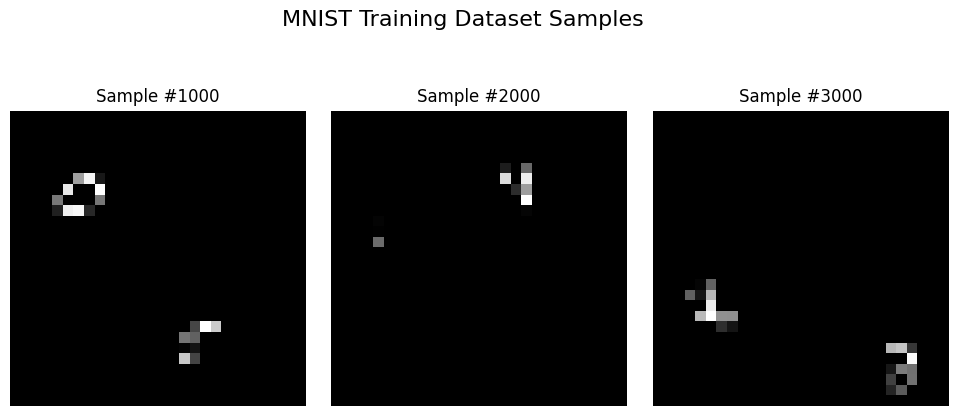

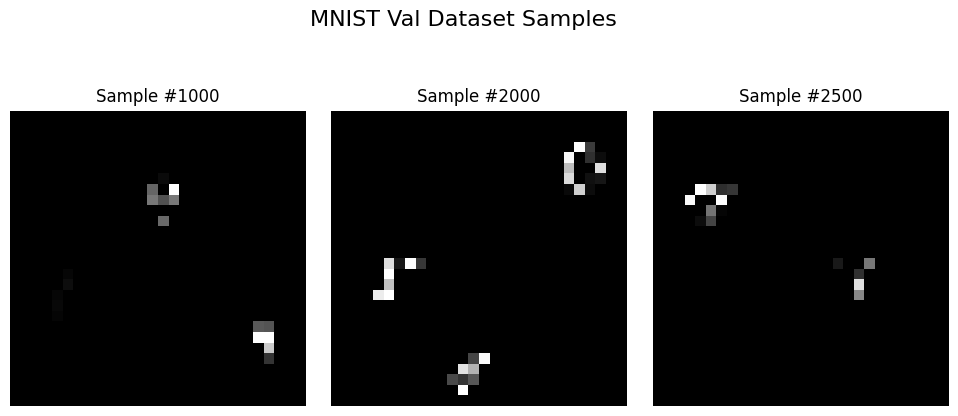

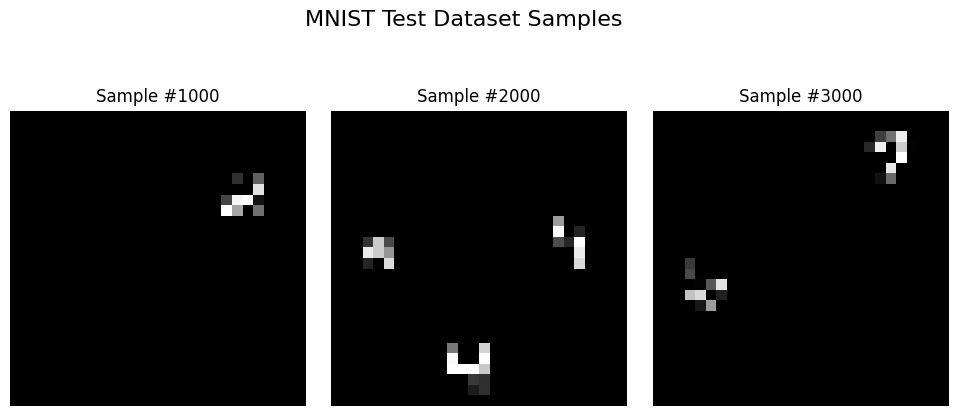

In [5]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Training Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._train_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._train_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(3000))
ax.axis('off')
plt.imshow(dataloader._train_images[3000], cmap='gray')
plt.show()

fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Val Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._valid_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._valid_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(2500))
ax.axis('off')
plt.imshow(dataloader._valid_images[2500], cmap='gray')
plt.show()

fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Test Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._test_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._test_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(3000))
ax.axis('off')
plt.imshow(dataloader._test_images[3000], cmap='gray')
plt.show()

In [ ]:
print(dataloader._train_images[0].shape)

(28, 28)


## Initialising the model

In [6]:
config_model = {'task': [], 'in_channels': [], 'ConvLayers': [], 'FCLayers': [], 'pool': [], 
                'kernel_size': [], 'strides': [], 'activation': [], 'dropout': []}

config_trainer = {'model': [], 'loss': [], 'epochs': [], 'batch_size': [], 'learning_rate': [], 
                  'optimizer': [], 'wandb': False, 'labels': [], 'labelsRnum': True, 'FM_Vis': False}

## Running the Model - Task 2.2

### Classification

Epoch:  0
Acc =  0.73355925
Loss =  0.96509796
Acc =  0.7685221
Loss =  0.80264574
Epoch:  1
Acc =  0.8040813
Loss =  0.748425
Acc =  0.86203456
Loss =  0.52649057
Epoch:  2
Acc =  0.82344544
Loss =  0.4073388
Acc =  0.8623195
Loss =  0.2979617
Epoch:  3
Acc =  0.91703683
Loss =  0.24860995
Acc =  0.9371675
Loss =  0.21207994
Epoch:  4
Acc =  0.95130074
Loss =  0.11148691
Acc =  0.9557371
Loss =  0.11294858
Epoch:  5
Acc =  0.95050764
Loss =  0.09022342
Acc =  0.9577792
Loss =  0.08784211
Epoch:  6
Acc =  0.99269176
Loss =  0.04338738
Acc =  0.99035907
Loss =  0.04951481
Epoch:  7
Acc =  0.9930203
Loss =  0.030379677
Acc =  0.9890292
Loss =  0.039977547
Epoch:  8
Acc =  0.99444795
Loss =  0.02563373
Acc =  0.9896942
Loss =  0.040635202
Epoch:  9
Acc =  0.99309963
Loss =  0.023328576
Acc =  0.9893617
Loss =  0.04357416


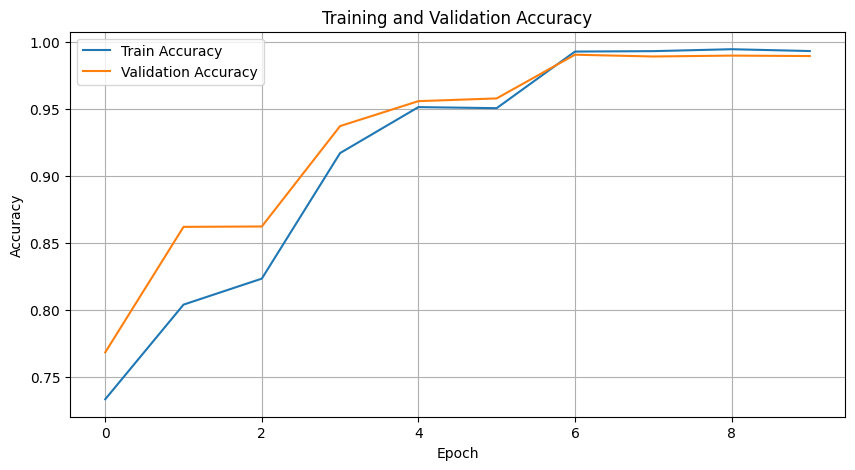

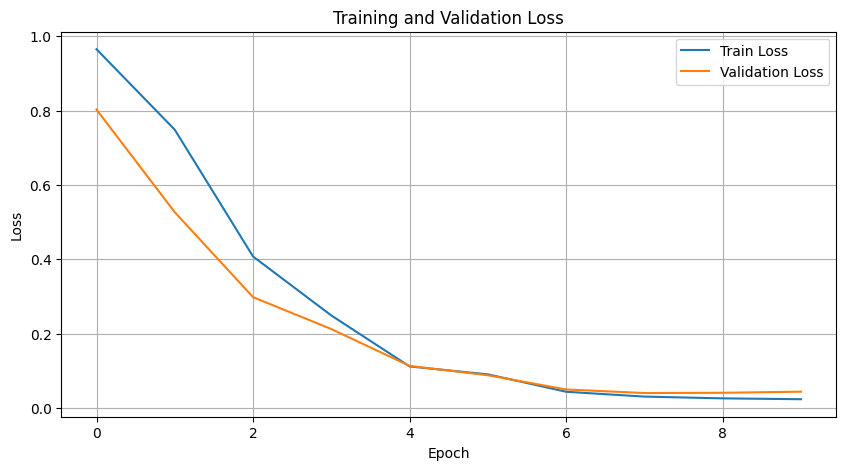

In [ ]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 4]
config_model['kernel_size'] = [3, 3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)
# trainer.evaluate(dataloader._test_images, dataloader._test_labels, True)

### Regression

Epoch:  0
Acc =  0.647752
Loss =  0.34389293
Acc =  0.68849736
Loss =  0.2864311
Epoch:  1
Acc =  0.6569525
Loss =  0.3133787
Acc =  0.7048822
Loss =  0.2617267
Epoch:  2
Acc =  0.65818757
Loss =  0.35146114
Acc =  0.68721503
Loss =  0.28550023
Epoch:  3
Acc =  0.5945091
Loss =  0.3895483
Acc =  0.64252466
Loss =  0.32023618
Epoch:  4
Acc =  0.6907859
Loss =  0.26956916
Acc =  0.73774695
Loss =  0.22237204
Epoch:  5
Acc =  0.70385015
Loss =  0.24481098
Acc =  0.7481478
Loss =  0.2068953
Epoch:  6
Acc =  0.6569185
Loss =  0.28376424
Acc =  0.699563
Loss =  0.25081307
Epoch:  7
Acc =  0.71186095
Loss =  0.2212103
Acc =  0.7493351
Loss =  0.20369312
Epoch:  8
Acc =  0.7093456
Loss =  0.21614195
Acc =  0.7506174
Loss =  0.20143779
Epoch:  9
Acc =  0.7704065
Loss =  0.17100272
Acc =  0.7989172
Loss =  0.15540694


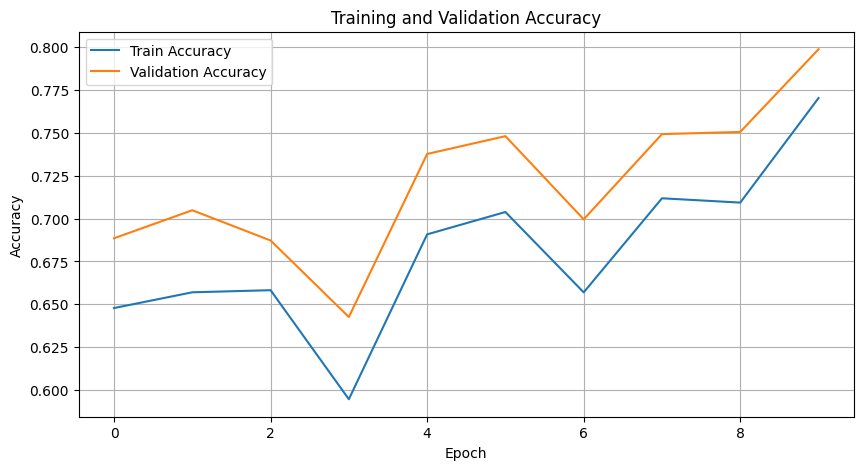

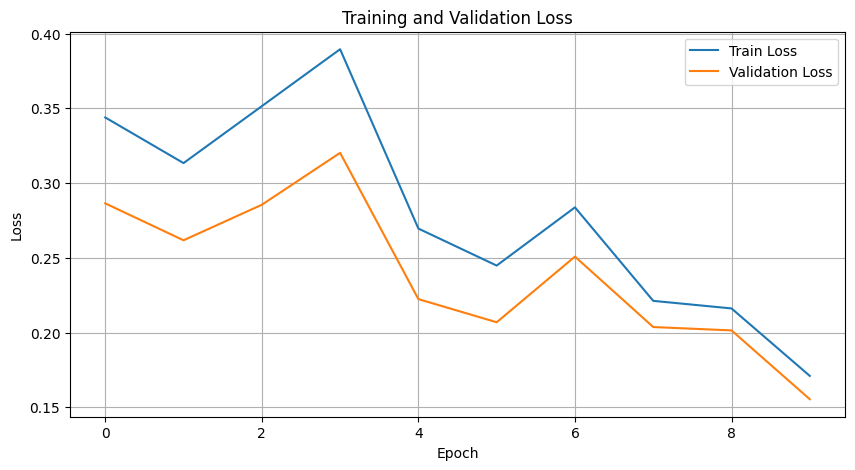

In [ ]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 10]
config_model['FCLayers'] = [10*28*28, 512, 1]
config_model['kernel_size'] = [3, 3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = None
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

## Hyperparameter Tuning - Task 2.3

### Classification

Conv_layers = [32, 64]\
kernels = [5, 5]\
lr = [0.001]\
dropout = 0.5\
pool = [2, 2]\
activiation = relu\
loss = cross_entropy\
optimiser = Adam

Epoch:  0
Acc =  0.5076142
Loss =  1.2244996
Acc =  0.5340995
Loss =  1.148029
Epoch:  1
Acc =  0.7333213
Loss =  2.2590485
Acc =  0.76790464
Loss =  1.7846361
Epoch:  2
Acc =  0.8418238
Loss =  0.65931815
Acc =  0.8935695
Loss =  0.47075182
Epoch:  3
Acc =  0.92695117
Loss =  0.66776514
Acc =  0.94908816
Loss =  0.56812024
Epoch:  4
Acc =  0.93710345
Loss =  0.12257207
Acc =  0.9328458
Loss =  0.13468248
Epoch:  5
Acc =  0.98326457
Loss =  0.098216176
Acc =  0.9807181
Loss =  0.09535638
Epoch:  6
Acc =  0.9897571
Loss =  0.07726504
Acc =  0.9880319
Loss =  0.07522901
Epoch:  7
Acc =  0.9907995
Loss =  0.042352147
Acc =  0.9896942
Loss =  0.045494642
Epoch:  8
Acc =  0.9915133
Loss =  0.032044943
Acc =  0.9890292
Loss =  0.03883826
Epoch:  9
Acc =  0.9923858
Loss =  0.028358549
Acc =  0.9896942
Loss =  0.040000398


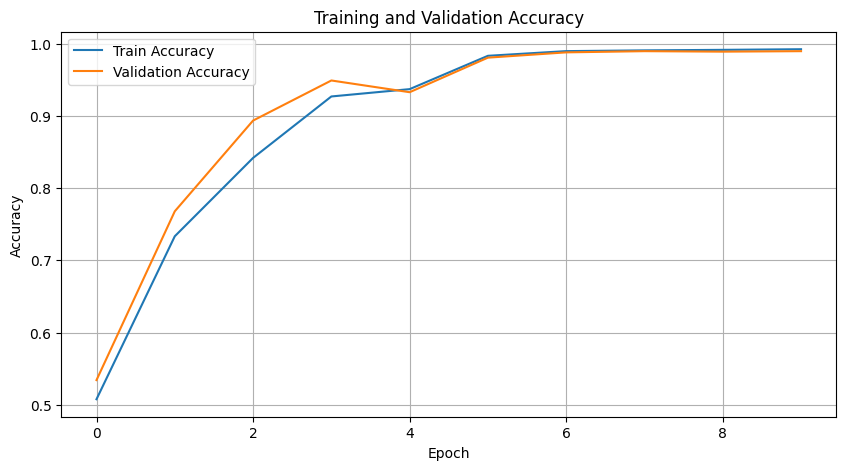

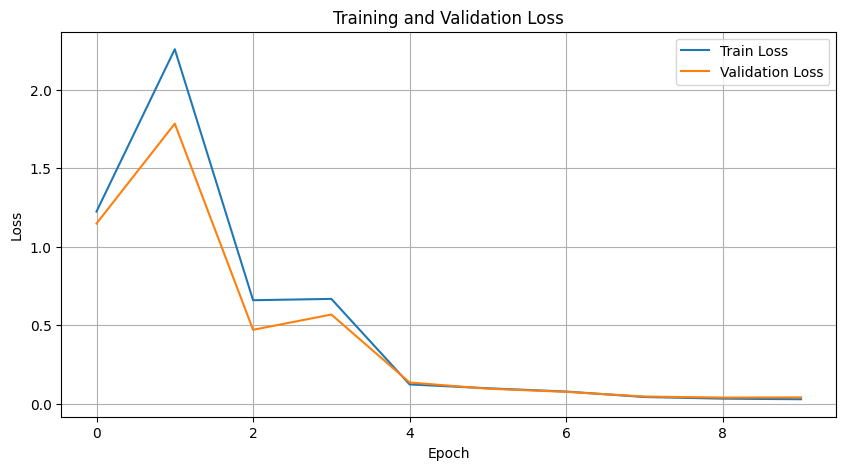

In [ ]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 4]
config_model['kernel_size'] = [5, 5]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'], momentum=0.9)
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = False

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64, 128]\
kernels = [3, 3, 7]\
lr = [0.001]\
dropout = 0.5\
pool = [2, 2, 2]\
activiation = relu\
loss = cross_entropy\
optimiser = sgd

Epoch:  0
Acc =  0.5073989
Loss =  1.3384111
Acc =  0.53072757
Loss =  1.3336921
Epoch:  1
Acc =  0.5076142
Loss =  1.2879484
Acc =  0.5340995
Loss =  1.2782533
Epoch:  2
Acc =  0.5076142
Loss =  1.2185224
Acc =  0.5340995
Loss =  1.1999732
Epoch:  3
Acc =  0.5076142
Loss =  1.1571882
Acc =  0.5340995
Loss =  1.1259403
Epoch:  4
Acc =  0.5076142
Loss =  1.1396841
Acc =  0.5340995
Loss =  1.0988231
Epoch:  5
Acc =  0.5076142
Loss =  1.1337726
Acc =  0.5340995
Loss =  1.0918123
Epoch:  6
Acc =  0.5076142
Loss =  1.1323715
Acc =  0.5340995
Loss =  1.0856397
Epoch:  7
Acc =  0.5076142
Loss =  1.1297168
Acc =  0.5340995
Loss =  1.0880864
Epoch:  8
Acc =  0.5076142
Loss =  1.1296468
Acc =  0.5340995
Loss =  1.0881916
Epoch:  9
Acc =  0.5076142
Loss =  1.1281576
Acc =  0.5340995
Loss =  1.0849419


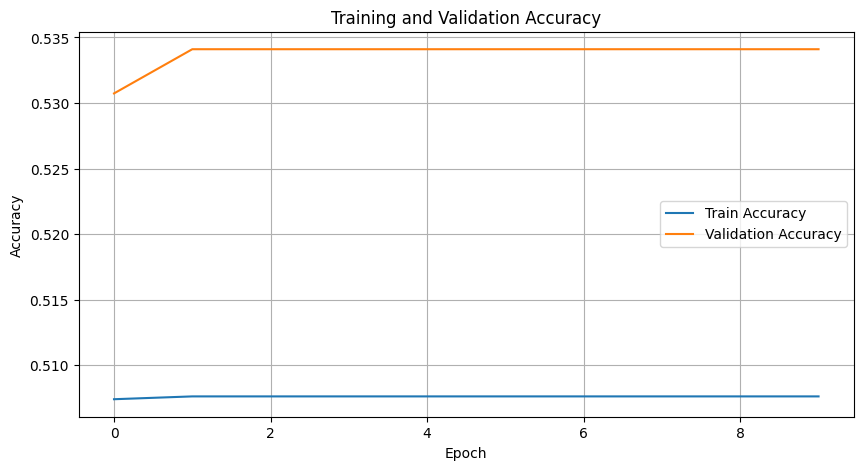

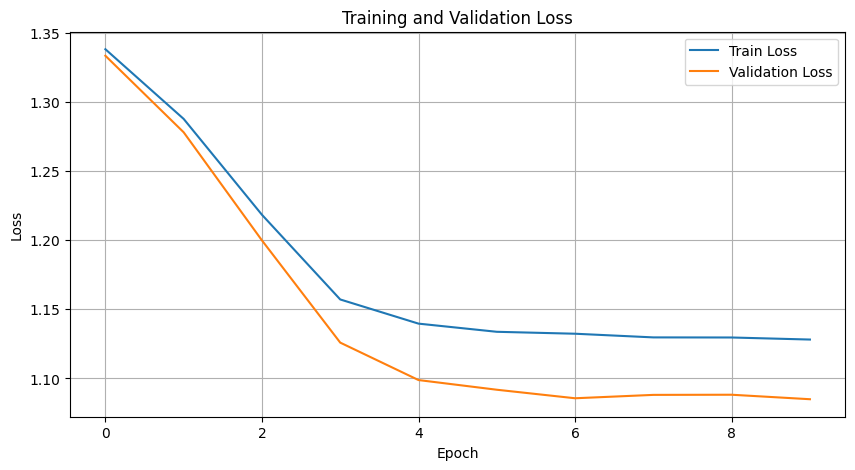

In [ ]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64, 128]
config_model['FCLayers'] = [128*7*7, 512, 4]
config_model['kernel_size'] = [3, 3, 7]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2, 1]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.SGD(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = False

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64]\
kernels = [3, 3]\
lr = [0.01]\
dropout = 0.7\
pool = [2, 2]\
activiation = tanh\
loss = cross_entropy\
optimiser = sgd

Epoch:  0
Acc =  0.5074556
Loss =  5.856032
Acc =  0.5334346
Loss =  4.9991245
Epoch:  1
Acc =  0.5076142
Loss =  5.110978
Acc =  0.5340995
Loss =  4.484253
Epoch:  2
Acc =  0.5047702
Loss =  4.726716
Acc =  0.5334346
Loss =  4.117621
Epoch:  3
Acc =  0.5076142
Loss =  6.2461433
Acc =  0.5340995
Loss =  5.4172945
Epoch:  4
Acc =  0.5076142
Loss =  6.041458
Acc =  0.5340995
Loss =  5.206645
Epoch:  5
Acc =  0.5076142
Loss =  5.47619
Acc =  0.5340995
Loss =  4.7995687
Epoch:  6
Acc =  0.5076142
Loss =  5.6341844
Acc =  0.5340995
Loss =  4.929331
Epoch:  7
Acc =  0.5076142
Loss =  6.1533365
Acc =  0.5340995
Loss =  5.328349
Epoch:  8
Acc =  0.5076142
Loss =  5.85798
Acc =  0.5340995
Loss =  5.133565
Epoch:  9
Acc =  0.5076142
Loss =  6.1432133
Acc =  0.5340995
Loss =  5.3550286


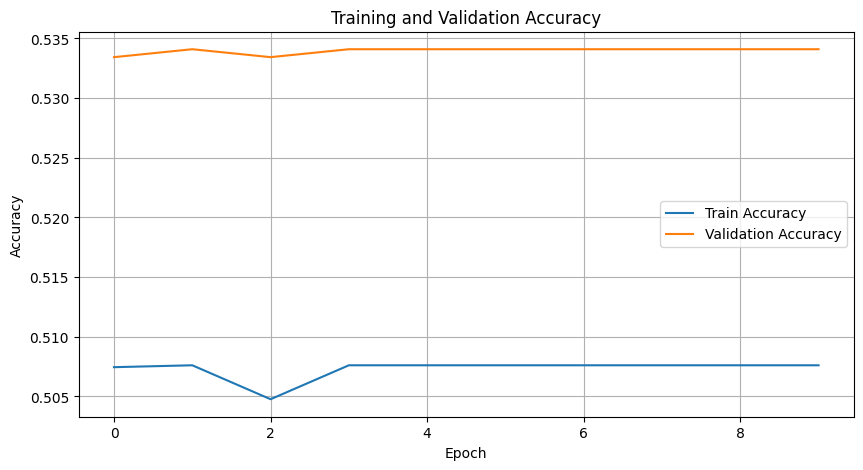

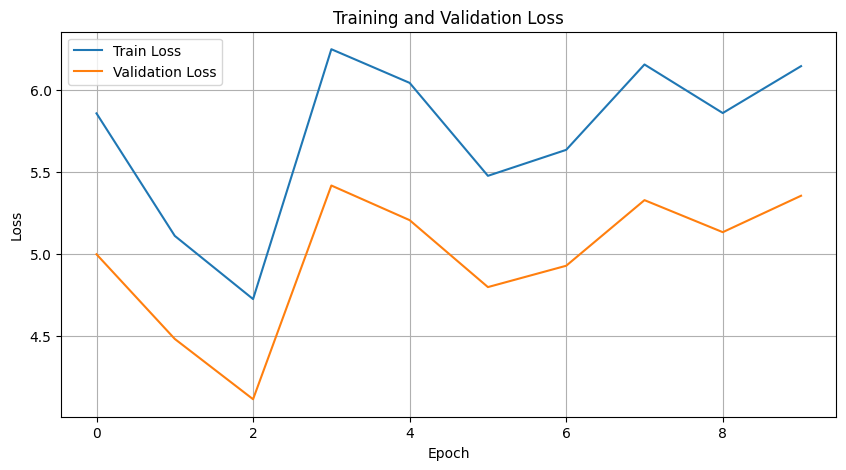

In [ ]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 4]
config_model['kernel_size'] = [3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'tanh'
config_model['dropout'] = 0.7

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.01
config_trainer['optimizer'] = optim.SGD(model.parameters(), lr=config_trainer['learning_rate'], momentum=0.9)
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = False

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64]\
kernels = [3, 3]\
lr = [0.01]\
dropout = 0.7\
pool = [2, 2]\
activiation = tanh\
loss = cross_entropy\
optimiser = adam

Epoch:  0
Acc =  0.5076935
Loss =  3.506326
Acc =  0.5340995
Loss =  3.0776653
Epoch:  1
Acc =  0.5076142
Loss =  4.449996
Acc =  0.5340995
Loss =  3.8709974
Epoch:  2
Acc =  0.5076142
Loss =  3.9475386
Acc =  0.5340995
Loss =  3.457043
Epoch:  3
Acc =  0.5076142
Loss =  4.2475567
Acc =  0.5340995
Loss =  3.6847043
Epoch:  4
Acc =  0.5076142
Loss =  4.023496
Acc =  0.5340995
Loss =  3.5095043
Epoch:  5
Acc =  0.5076142
Loss =  4.190966
Acc =  0.5340995
Loss =  3.64111
Epoch:  6
Acc =  0.5076142
Loss =  4.1035304
Acc =  0.5340995
Loss =  3.551781
Epoch:  7
Acc =  0.5076142
Loss =  4.0707984
Acc =  0.5340995
Loss =  3.5396461
Epoch:  8
Acc =  0.5076142
Loss =  4.117105
Acc =  0.5340995
Loss =  3.574247
Epoch:  9
Acc =  0.5076142
Loss =  4.1213994
Acc =  0.5340995
Loss =  3.6079981


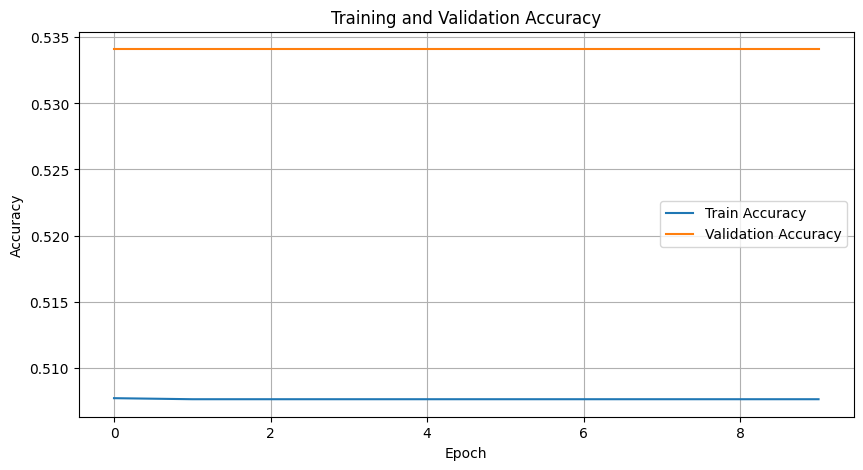

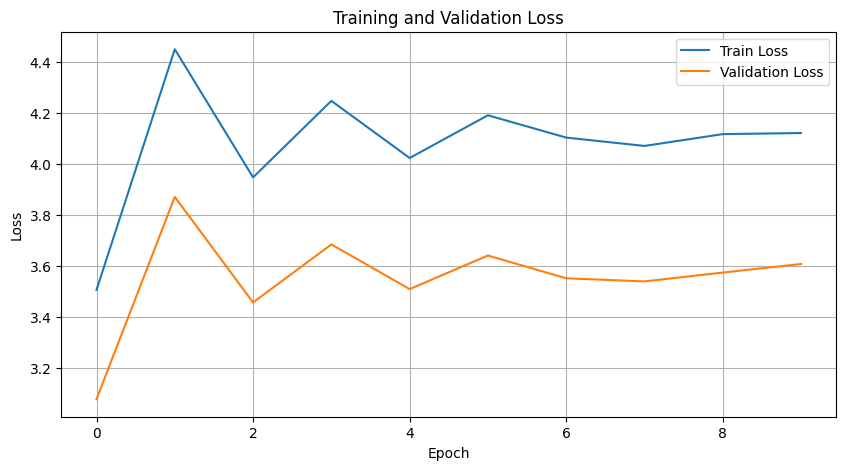

In [ ]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 4]
config_model['kernel_size'] = [3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'tanh'
config_model['dropout'] = 0.7

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.01
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = False

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64]\
kernels = [3, 3]\
lr = [0.001]\
dropout = 0.5\
pool = [2, 2]\
activiation = relu\
loss = cross_entropy\
optimiser = adam

Epoch:  0
Acc =  0.71512413
Loss =  1.0310357
Acc =  0.74981
Loss =  0.9010492
Epoch:  1
Acc =  0.7586453
Loss =  0.7380131
Acc =  0.7965425
Loss =  0.56705827
Epoch:  2
Acc =  0.8377901
Loss =  0.63263816
Acc =  0.8932371
Loss =  0.47026485
Epoch:  3
Acc =  0.8561005
Loss =  0.33593267
Acc =  0.8899126
Loss =  0.25390857
Epoch:  4
Acc =  0.93662757
Loss =  0.14449261
Acc =  0.95146275
Loss =  0.11718195
Epoch:  5
Acc =  0.97065353
Loss =  0.07933579
Acc =  0.97273934
Loss =  0.07349102
Epoch:  6
Acc =  0.98580265
Loss =  0.04608683
Acc =  0.98836434
Loss =  0.052638765
Epoch:  7
Acc =  0.98937184
Loss =  0.038443457
Acc =  0.98703456
Loss =  0.04827372
Epoch:  8
Acc =  0.9903236
Loss =  0.03216971
Acc =  0.98703456
Loss =  0.042405497
Epoch:  9
Acc =  0.99175125
Loss =  0.026567517
Acc =  0.9880319
Loss =  0.045294084


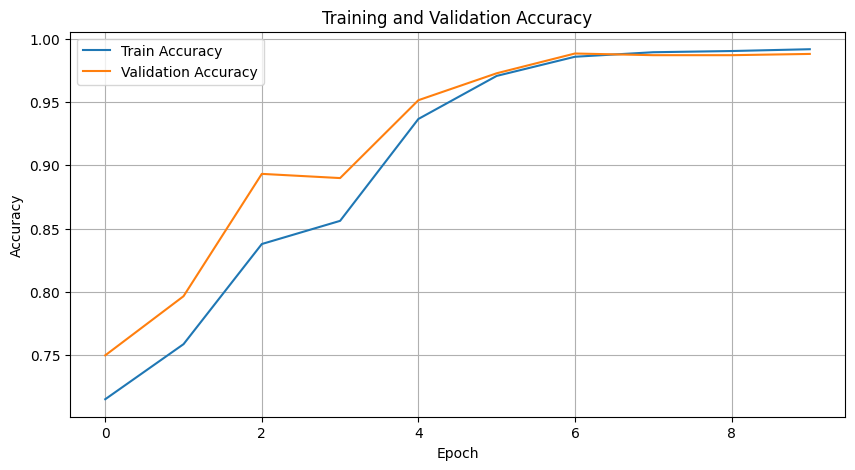

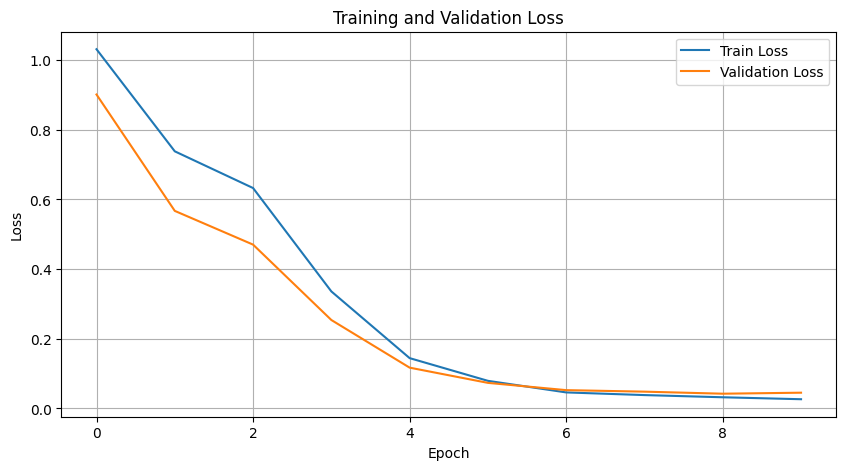

In [ ]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 4]
config_model['kernel_size'] = [3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = False

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64]\
kernels = [3, 3]\
lr = [0.1]\
dropout = 0.3\
pool = [2, 2]\
activiation = relu\
loss = cross_entropy\
optimiser = adam

Epoch:  0
Acc =  0.5076142
Loss =  1.2272187
Acc =  0.5340995
Loss =  1.1515937
Epoch:  1
Acc =  0.5076142
Loss =  1.2246476
Acc =  0.5340995
Loss =  1.1492534
Epoch:  2
Acc =  0.5076142
Loss =  1.2241433
Acc =  0.5340995
Loss =  1.1487215
Epoch:  3
Acc =  0.5076142
Loss =  1.22398
Acc =  0.5340995
Loss =  1.1485273
Epoch:  4
Acc =  0.5076142
Loss =  1.223904
Acc =  0.5340995
Loss =  1.1484289
Epoch:  5
Acc =  0.5076142
Loss =  1.2238613
Acc =  0.5340995
Loss =  1.1483709
Epoch:  6
Acc =  0.5076142
Loss =  1.2238346
Acc =  0.5340995
Loss =  1.1483331
Epoch:  7
Acc =  0.5076142
Loss =  1.2238165
Acc =  0.5340995
Loss =  1.1483068
Epoch:  8
Acc =  0.5076142
Loss =  1.2238032
Acc =  0.5340995
Loss =  1.1482873
Epoch:  9
Acc =  0.5076142
Loss =  1.2237933
Acc =  0.5340995
Loss =  1.1482732


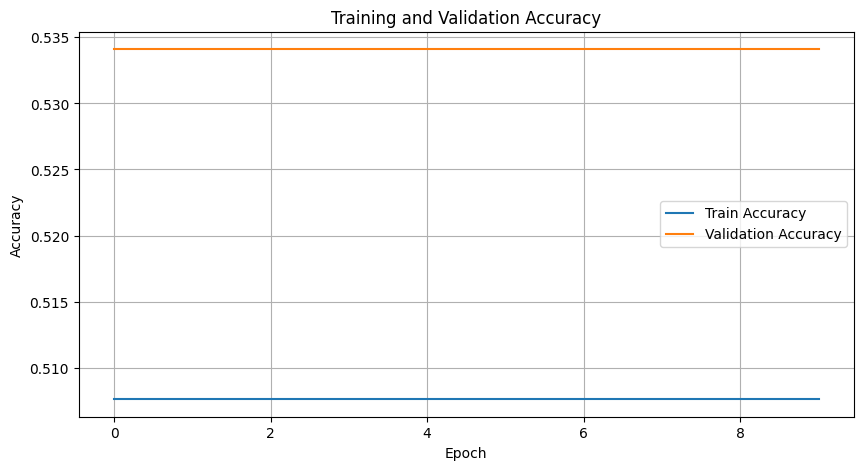

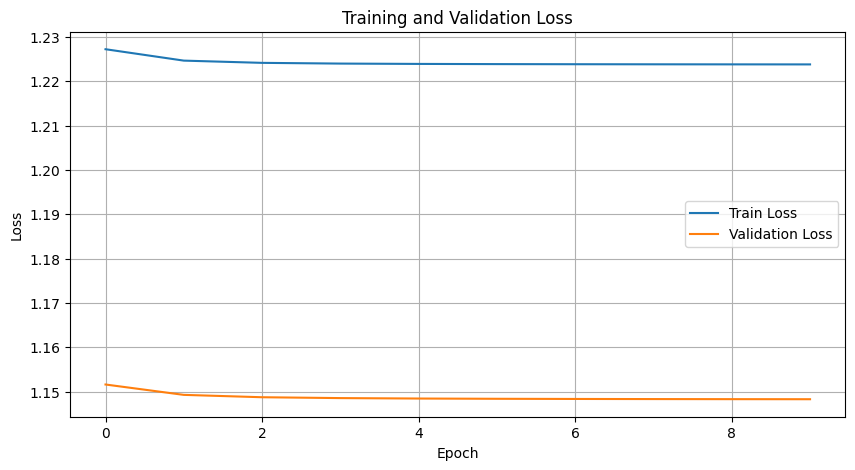

In [ ]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 4]
config_model['kernel_size'] = [3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.3

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.1
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = False

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

### Regression

Conv_layers = [32, 64]\
kernels = [3, 3]\
lr = [0.001]\
dropout = 0.5\
pool = [2, 2]\
activiation = relu\
loss = mse\
optimiser = adam

Epoch:  0
Acc =  0.576822
Loss =  0.52240586
Acc =  0.60785526
Loss =  0.4361534
Epoch:  1
Acc =  0.666017
Loss =  0.28205356
Acc =  0.7084442
Loss =  0.23867062
Epoch:  2
Acc =  0.66779596
Loss =  0.25877208
Acc =  0.7364172
Loss =  0.21714036
Epoch:  3
Acc =  0.70925486
Loss =  0.2170407
Acc =  0.74886024
Loss =  0.19349015
Epoch:  4
Acc =  0.73640317
Loss =  0.19052602
Acc =  0.7664799
Loss =  0.16876085
Epoch:  5
Acc =  0.7615119
Loss =  0.19236453
Acc =  0.7956402
Loss =  0.16895722
Epoch:  6
Acc =  0.81750816
Loss =  0.14654973
Acc =  0.82670027
Loss =  0.14205344
Epoch:  7
Acc =  0.8726659
Loss =  0.11316507
Acc =  0.8767097
Loss =  0.11191049
Epoch:  8
Acc =  0.83902514
Loss =  0.12898198
Acc =  0.84194535
Loss =  0.124589495
Epoch:  9
Acc =  0.8664
Loss =  0.114707954
Acc =  0.8704407
Loss =  0.11416966


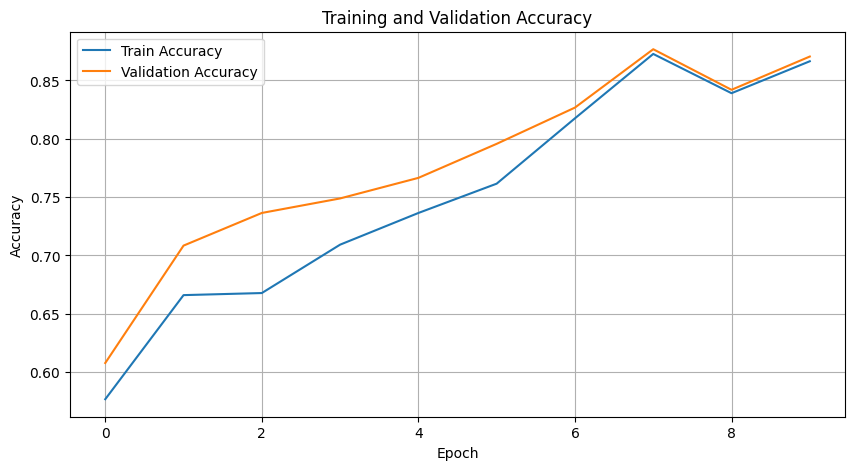

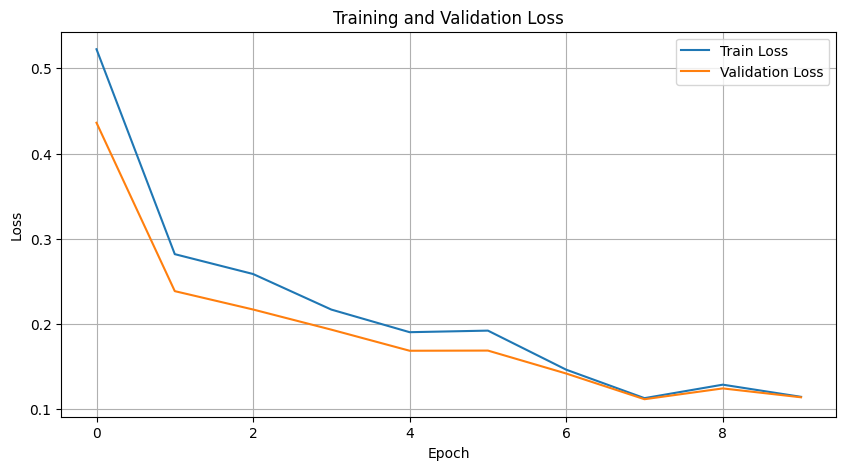

In [ ]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 1]
config_model['kernel_size'] = [3, 3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64, 128]\
kernels = [3, 3, 7]\
lr = [0.001]\
dropout = 0.5\
pool = [2, 2, 1]\
activiation = relu\
loss = mse\
optimiser = adam

Epoch:  0
Acc =  0.56441486
Loss =  0.722653
Acc =  0.5835391
Loss =  0.6316439
Epoch:  1
Acc =  0.6399338
Loss =  0.3328824
Acc =  0.6853153
Loss =  0.26817575
Epoch:  2
Acc =  0.7053232
Loss =  0.22638714
Acc =  0.7525171
Loss =  0.19310053
Epoch:  3
Acc =  0.75337654
Loss =  0.1852119
Acc =  0.80019945
Loss =  0.15800318
Epoch:  4
Acc =  0.7818052
Loss =  0.16123745
Acc =  0.81306994
Loss =  0.1451289
Epoch:  5
Acc =  0.8200689
Loss =  0.13445228
Acc =  0.83719605
Loss =  0.124463156
Epoch:  6
Acc =  0.8464241
Loss =  0.116521865
Acc =  0.86013484
Loss =  0.11347446
Epoch:  7
Acc =  0.84897345
Loss =  0.11462457
Acc =  0.85586053
Loss =  0.11029586
Epoch:  8
Acc =  0.8393084
Loss =  0.12067837
Acc =  0.84284765
Loss =  0.11861307
Epoch:  9
Acc =  0.87258655
Loss =  0.10035129
Acc =  0.8665939
Loss =  0.10502173


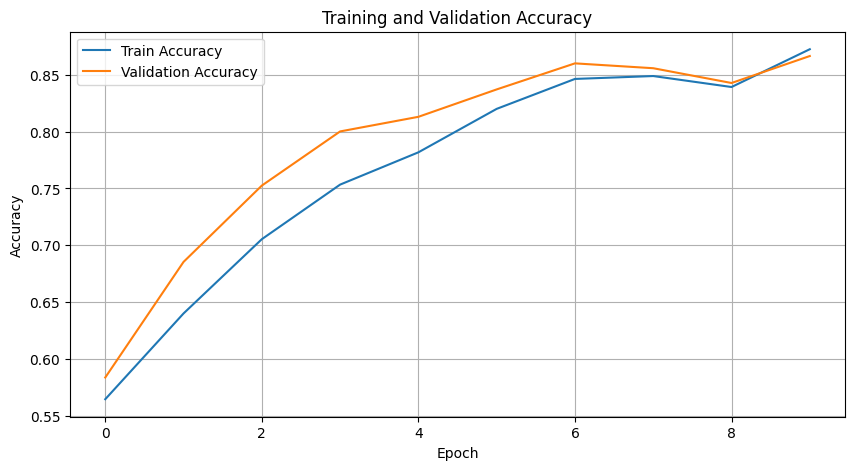

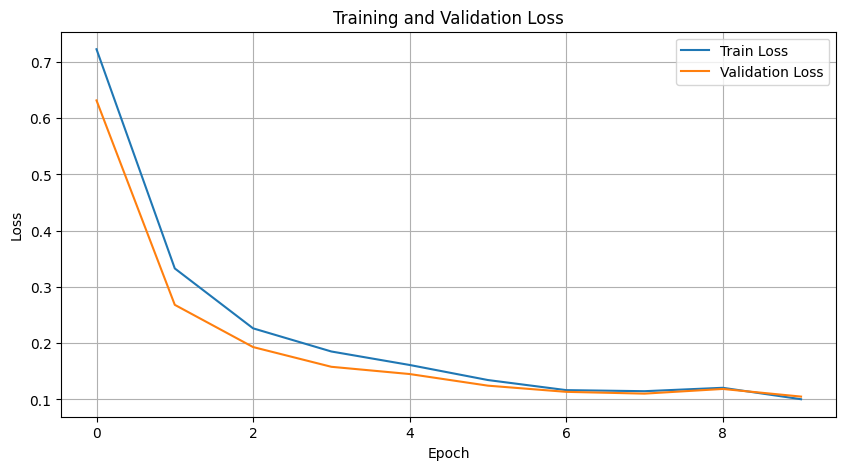

In [ ]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64, 128]
config_model['FCLayers'] = [128*7*7, 512, 1]
config_model['kernel_size'] = [3, 3, 7]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2, 1]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64]\
kernels = [3, 3]\
lr = [0.01]\
dropout = 0.5\
pool = [2, 2]\
activiation = relu\
loss = mse\
optimiser = sgd

Epoch:  0
Acc =  0.29381573
Loss =  1.1246369
Acc =  0.30841565
Loss =  0.998508
Epoch:  1
Acc =  0.66405684
Loss =  0.44756138
Acc =  0.6875
Loss =  0.36981732
Epoch:  2
Acc =  0.70567435
Loss =  0.3056221
Acc =  0.74064404
Loss =  0.23925439
Epoch:  3
Acc =  0.70982146
Loss =  0.27271384
Acc =  0.7584061
Loss =  0.20703241
Epoch:  4
Acc =  0.7111811
Loss =  0.25839636
Acc =  0.76144564
Loss =  0.20140912
Epoch:  5
Acc =  0.71963376
Loss =  0.24339093
Acc =  0.7840996
Loss =  0.18503858
Epoch:  6
Acc =  0.7323241
Loss =  0.22231728
Acc =  0.79867965
Loss =  0.16695046
Epoch:  7
Acc =  0.7412867
Loss =  0.21705255
Acc =  0.8050912
Loss =  0.16213985
Epoch:  8
Acc =  0.7401537
Loss =  0.21424799
Acc =  0.8093655
Loss =  0.16366966
Epoch:  9
Acc =  0.755654
Loss =  0.1937245
Acc =  0.82043123
Loss =  0.14753602


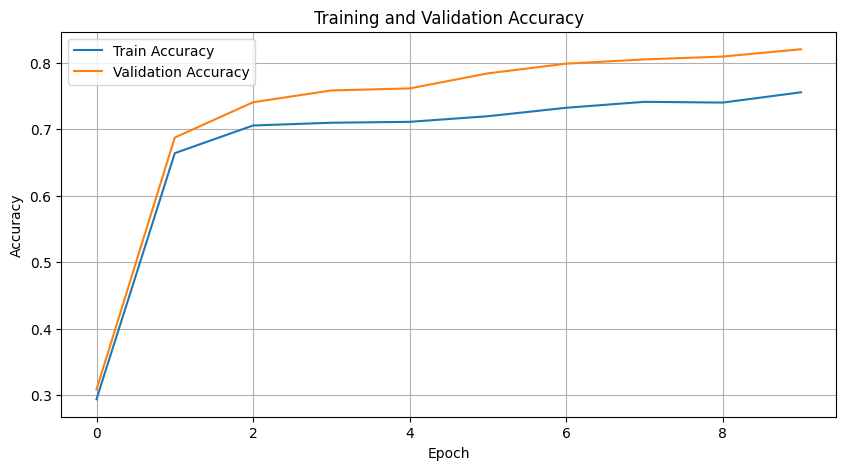

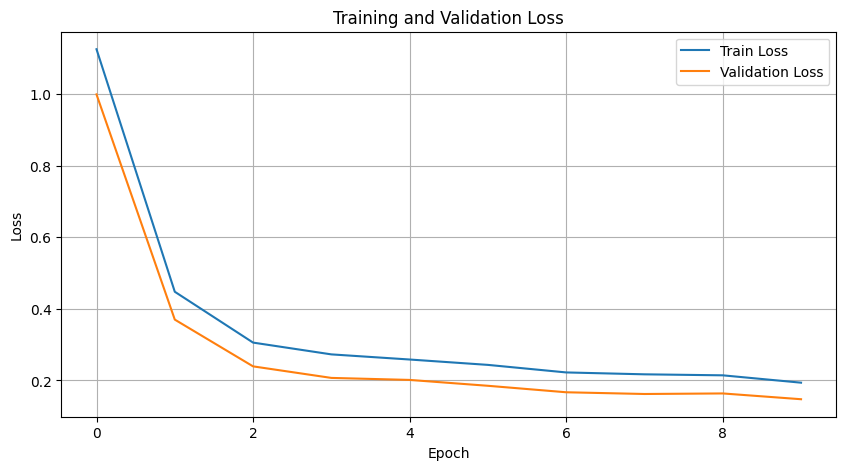

In [ ]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 1]
config_model['kernel_size'] = [3, 3]
config_model['strides'] = [1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.01
config_trainer['optimizer'] = optim.SGD(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64]\
kernels = [5, 5]\
lr = [0.01]\
dropout = 0.5\
pool = [2, 2]\
activiation = tanh\
loss = mse\
optimiser = sgd

Epoch:  0
Acc =  0.33394897
Loss =  0.86684275
Acc =  0.33729103
Loss =  0.75053155
Epoch:  1
Acc =  0.65150243
Loss =  0.33581582
Acc =  0.69101447
Loss =  0.2607852
Epoch:  2
Acc =  0.7204496
Loss =  0.25081715
Acc =  0.77046925
Loss =  0.18955617
Epoch:  3
Acc =  0.731565
Loss =  0.23805586
Acc =  0.79046357
Loss =  0.17447002
Epoch:  4
Acc =  0.73512286
Loss =  0.22714248
Acc =  0.7947379
Loss =  0.17068502
Epoch:  5
Acc =  0.74479926
Loss =  0.21009438
Acc =  0.8202887
Loss =  0.15517958
Epoch:  6
Acc =  0.7629623
Loss =  0.19404684
Acc =  0.82698524
Loss =  0.1412024
Epoch:  7
Acc =  0.76981735
Loss =  0.18505202
Acc =  0.84640956
Loss =  0.13487317
Epoch:  8
Acc =  0.7731373
Loss =  0.18071409
Acc =  0.85429335
Loss =  0.13351454
Epoch:  9
Acc =  0.77567536
Loss =  0.1774251
Acc =  0.85600305
Loss =  0.12999755


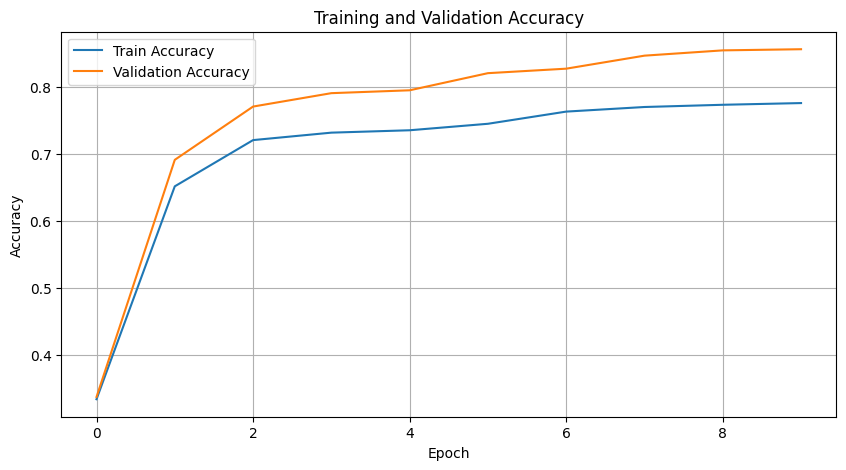

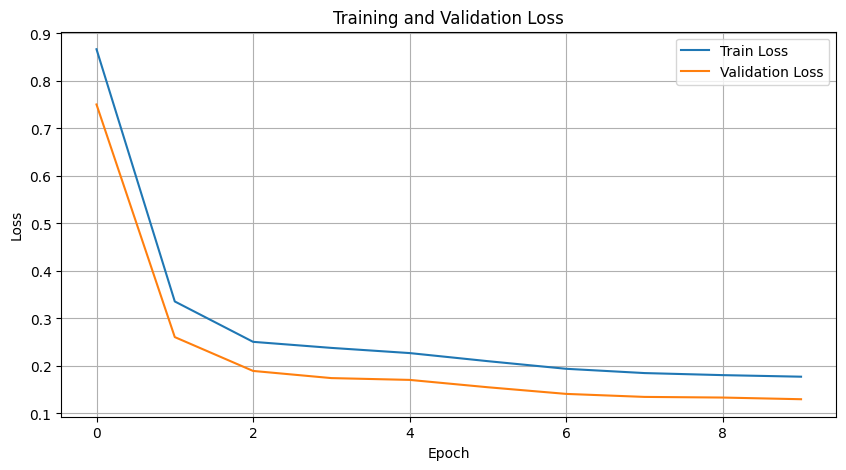

In [ ]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 1]
config_model['kernel_size'] = [5, 5]
config_model['strides'] = [1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'tanh'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.01
config_trainer['optimizer'] = optim.SGD(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64]\
kernels = [5, 5]\
lr = [0.01]\
dropout = 0.7\
pool = [2, 2]\
activiation = tanh\
loss = mse\
optimiser = adam

Epoch:  0
Acc =  0.45550445
Loss =  0.73881197
Acc =  0.46561548
Loss =  0.7222209
Epoch:  1
Acc =  0.4817576
Loss =  0.6855119
Acc =  0.51515007
Loss =  0.6535284
Epoch:  2
Acc =  0.4983457
Loss =  0.6624435
Acc =  0.52042174
Loss =  0.62240976
Epoch:  3
Acc =  0.50190353
Loss =  0.6547672
Acc =  0.528068
Loss =  0.61447316
Epoch:  4
Acc =  0.50230014
Loss =  0.65667486
Acc =  0.52540845
Loss =  0.6168855
Epoch:  5
Acc =  0.50198287
Loss =  0.6598296
Acc =  0.52640575
Loss =  0.62396836
Epoch:  6
Acc =  0.4989009
Loss =  0.6600277
Acc =  0.5284005
Loss =  0.61455864
Epoch:  7
Acc =  0.50223213
Loss =  0.6611085
Acc =  0.5287329
Loss =  0.6039721
Epoch:  8
Acc =  0.5026287
Loss =  0.65125364
Acc =  0.52612084
Loss =  0.61600465
Epoch:  9
Acc =  0.5032519
Loss =  0.65020007
Acc =  0.5284005
Loss =  0.61060745


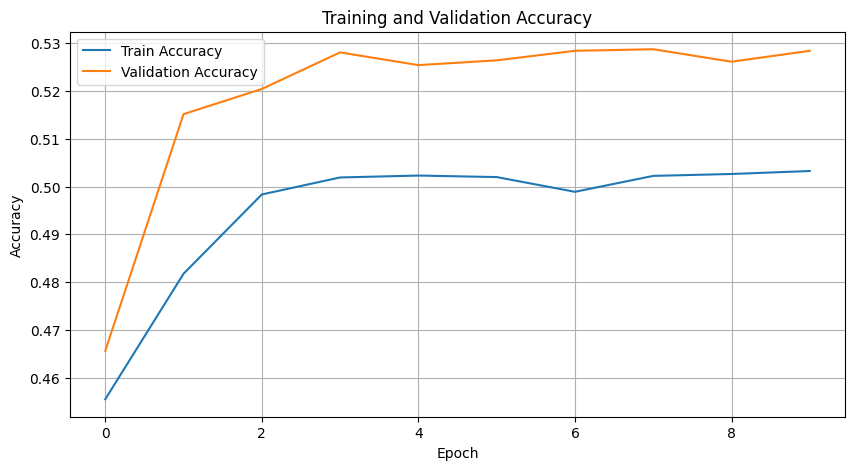

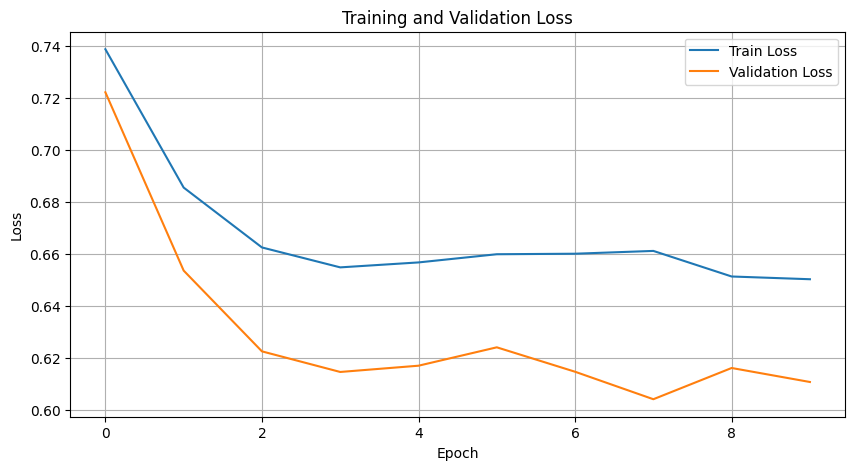

In [ ]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 1]
config_model['kernel_size'] = [5, 5]
config_model['strides'] = [1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'tanh'
config_model['dropout'] = 0.7

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.01
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Conv_layers = [32, 64]\
kernels = [5, 5]\
lr = [0.01]\
dropout = 0.3\
pool = [2, 2]\
activiation = relu\
loss = mse\
optimiser = adam

Epoch:  0
Acc =  0.53224707
Loss =  0.36334142
Acc =  0.5599829
Loss =  0.33554852
Epoch:  1
Acc =  0.80094266
Loss =  0.14355804
Acc =  0.799677
Loss =  0.1463096
Epoch:  2
Acc =  0.83112764
Loss =  0.12536804
Acc =  0.8277451
Loss =  0.12807135
Epoch:  3
Acc =  0.8598622
Loss =  0.10846798
Acc =  0.83976066
Loss =  0.11659151
Epoch:  4
Acc =  0.8494266
Loss =  0.11431898
Acc =  0.83819336
Loss =  0.12032301
Epoch:  5
Acc =  0.8806766
Loss =  0.10767367
Acc =  0.84887916
Loss =  0.11735556
Epoch:  6
Acc =  0.8840079
Loss =  0.10201874
Acc =  0.86407673
Loss =  0.10878299
Epoch:  7
Acc =  0.88767904
Loss =  0.10214979
Acc =  0.855813
Loss =  0.11301825
Epoch:  8
Acc =  0.90178573
Loss =  0.094682895
Acc =  0.87181795
Loss =  0.10709312
Epoch:  9
Acc =  0.5635424
Loss =  0.43414736
Acc =  0.5911379
Loss =  0.40666983


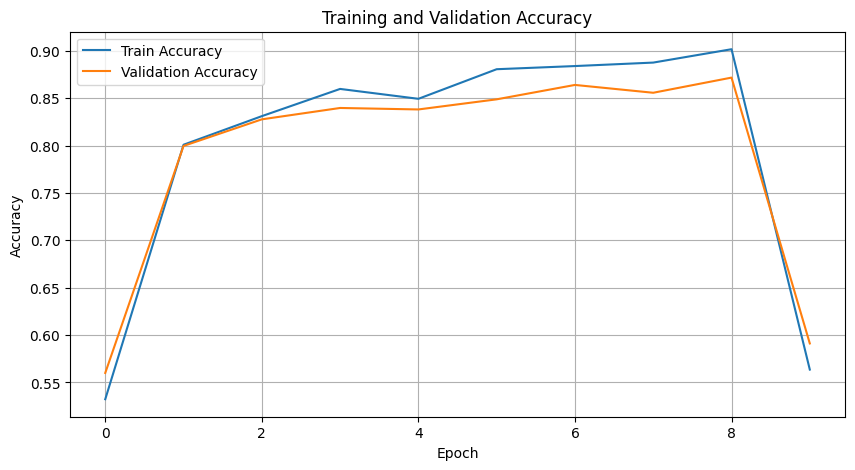

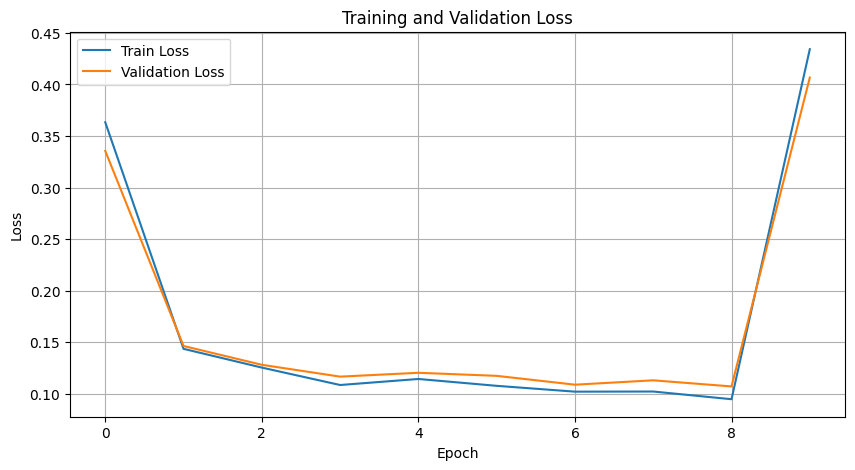

In [ ]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 1]
config_model['kernel_size'] = [5, 5]
config_model['strides'] = [1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.3

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.01
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

## Feature Map Visualisation

### Classification

Epoch:  0


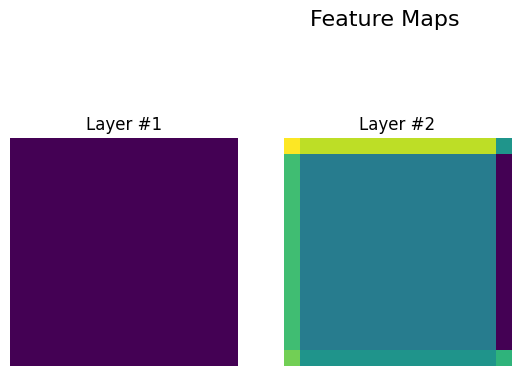

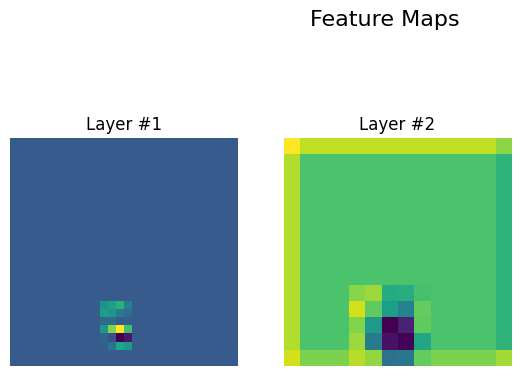

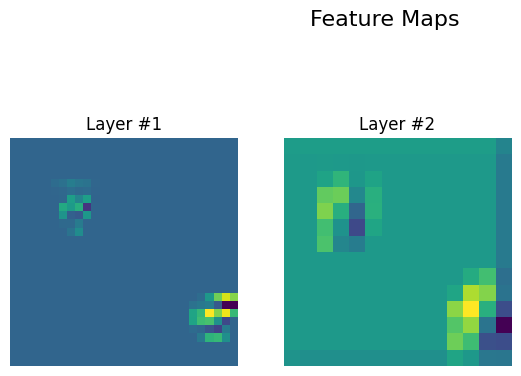

Acc =  0.7423518
Loss =  1.0099274
Acc =  0.7765958
Loss =  0.81769365
Epoch:  1


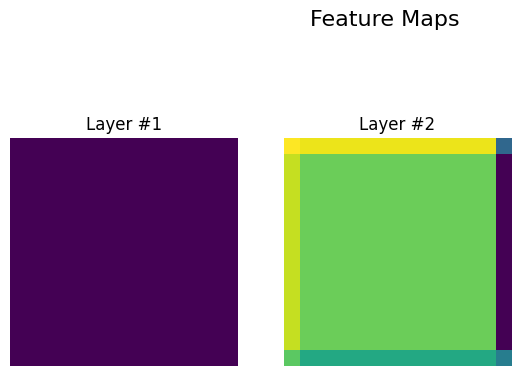

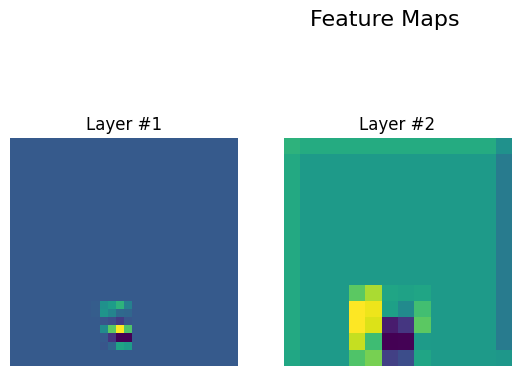

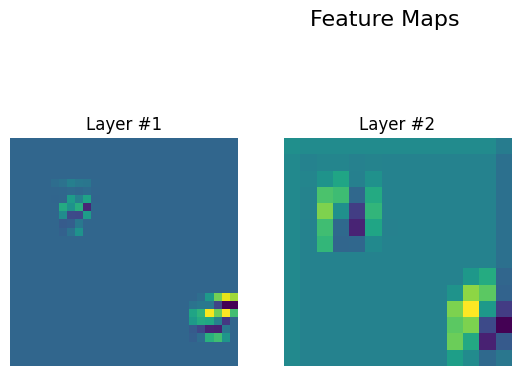

Acc =  0.77197015
Loss =  0.6938761
Acc =  0.82014626
Loss =  0.43474448
Epoch:  2


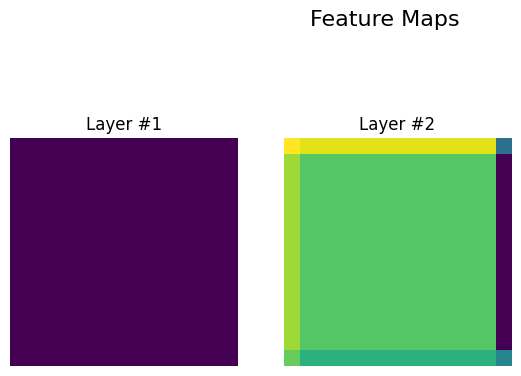

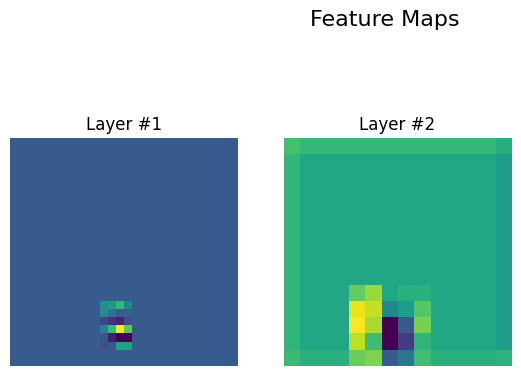

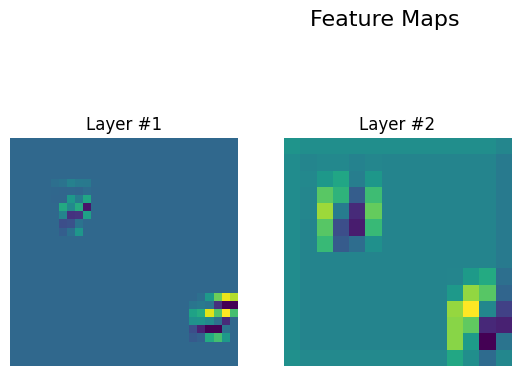

Acc =  0.8746827
Loss =  0.64568824
Acc =  0.92486703
Loss =  0.4703315
Epoch:  3


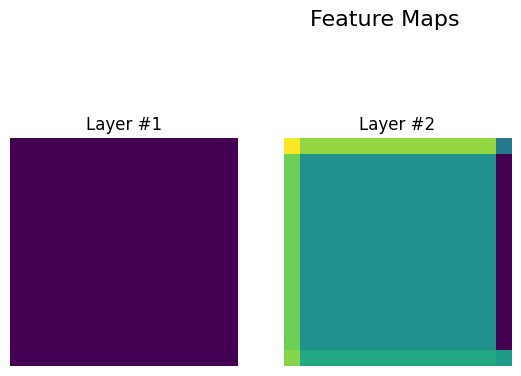

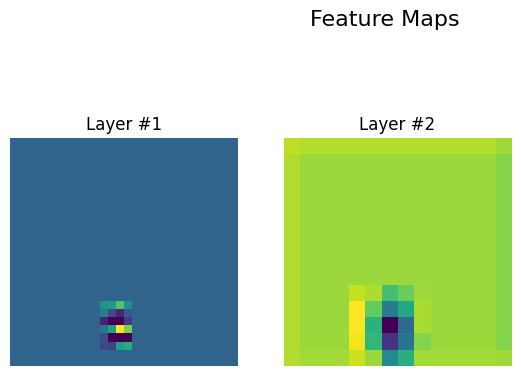

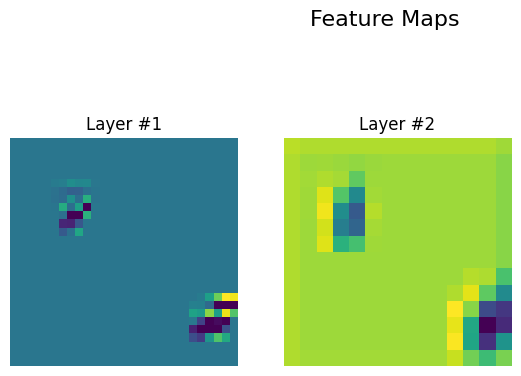

Acc =  0.8233661
Loss =  0.41330862
Acc =  0.8742876
Loss =  0.26981553
Epoch:  4


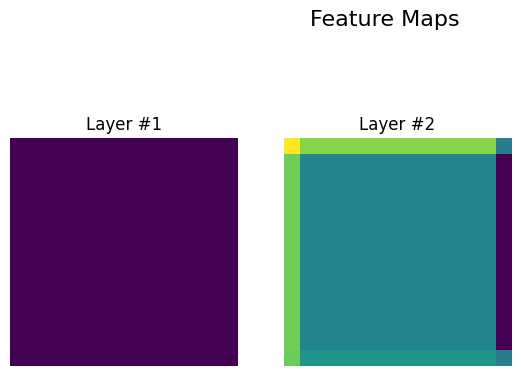

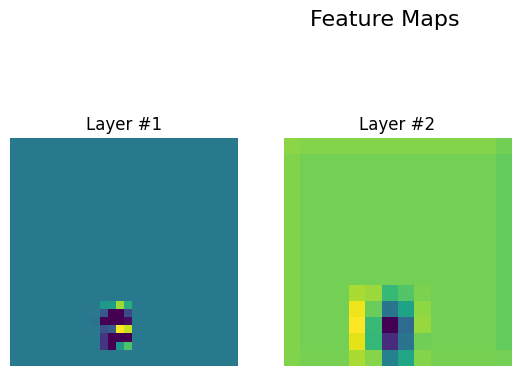

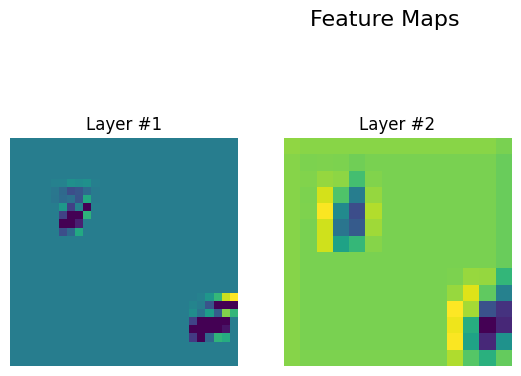

Acc =  0.92869604
Loss =  0.2483602
Acc =  0.9524601
Loss =  0.19586137
Epoch:  5


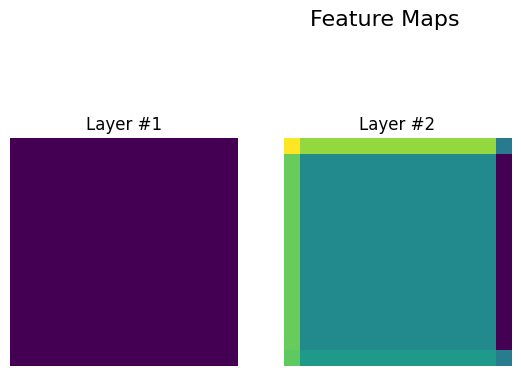

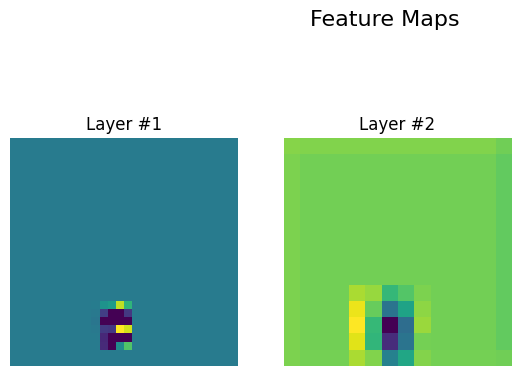

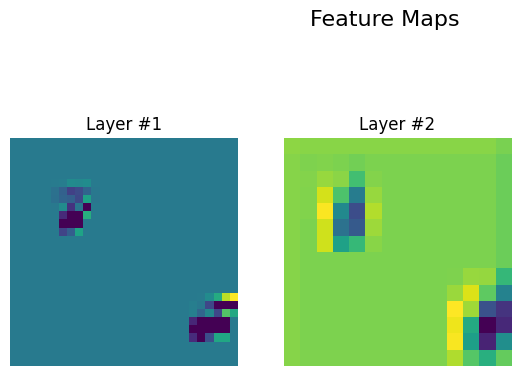

Acc =  0.95217323
Loss =  0.13052644
Acc =  0.9630984
Loss =  0.11150702
Epoch:  6


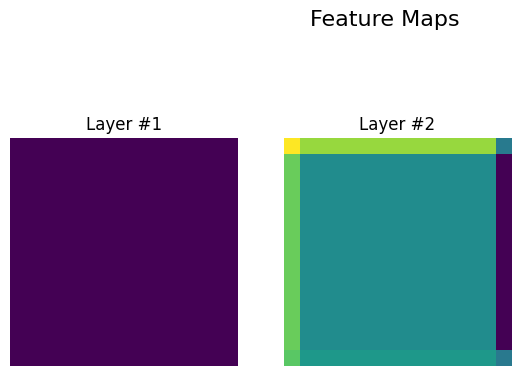

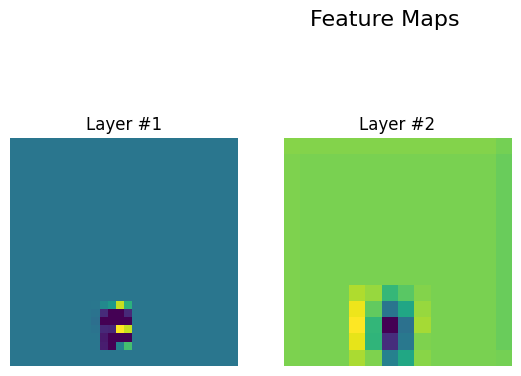

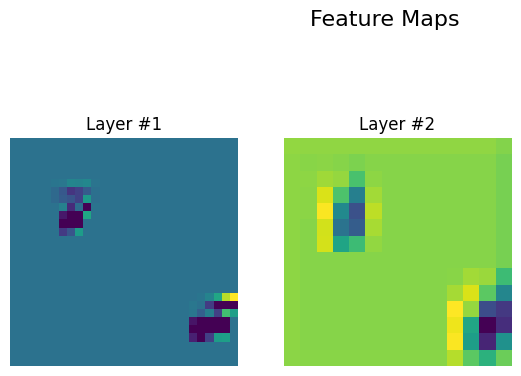

Acc =  0.97390544
Loss =  0.06913675
Acc =  0.9744016
Loss =  0.07737752
Epoch:  7


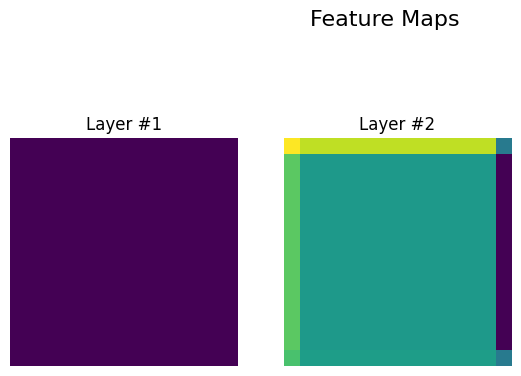

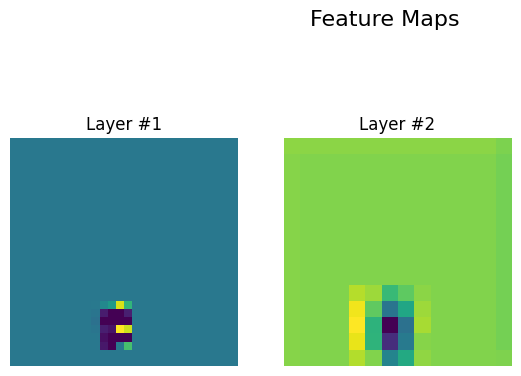

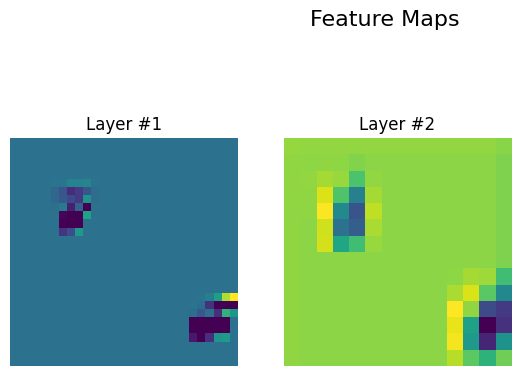

Acc =  0.9812817
Loss =  0.051916547
Acc =  0.98171544
Loss =  0.0572902
Epoch:  8


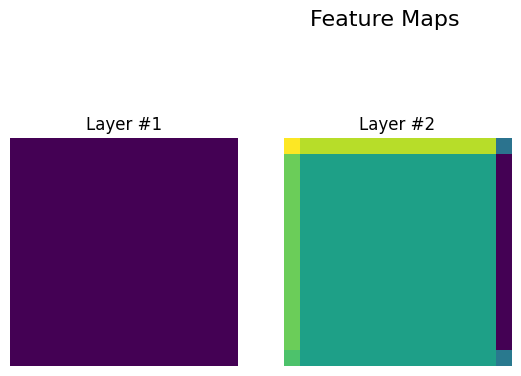

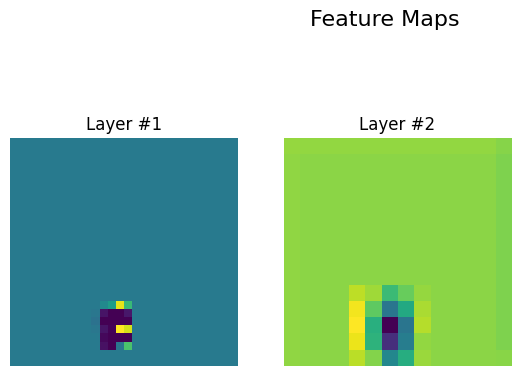

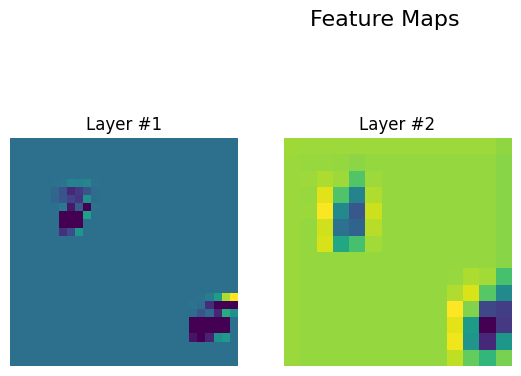

Acc =  0.9908788
Loss =  0.03550968
Acc =  0.98736703
Loss =  0.043778084
Epoch:  9


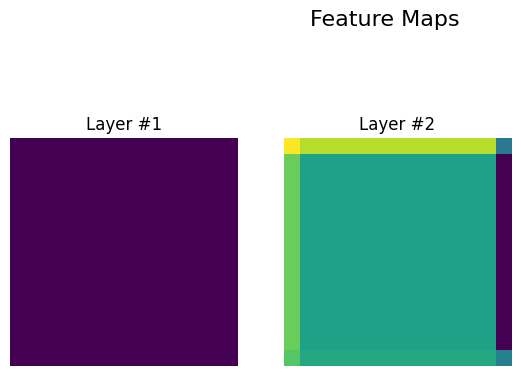

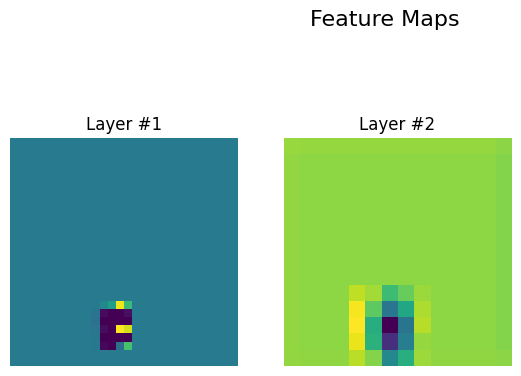

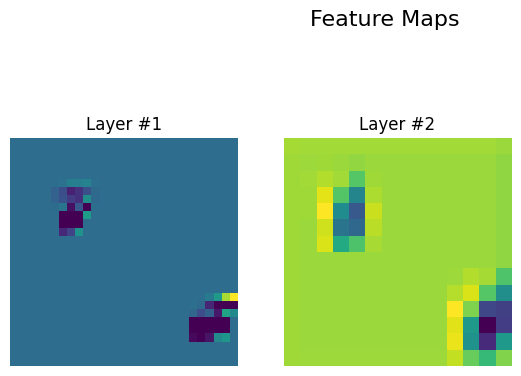

Acc =  0.99127537
Loss =  0.03328259
Acc =  0.9893617
Loss =  0.039067343


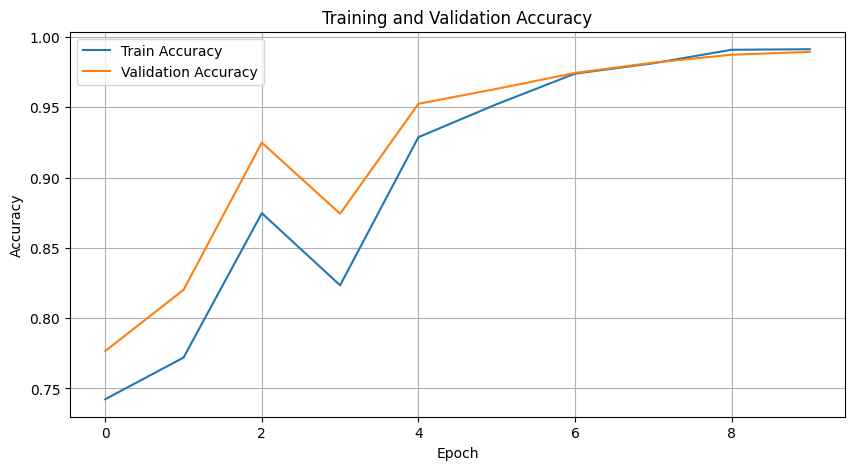

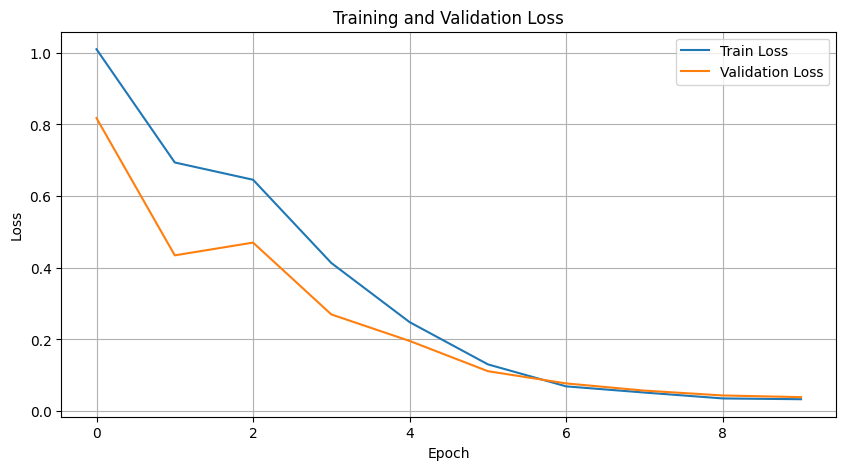

In [7]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 4]
config_model['kernel_size'] = [3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Observations:\
In my best model, I hav included two conv layers as follows:
1. Channels: 32, Kernel size: 3 (stride = 1), padding: 1, pool: 2x2 (stride = 2)
2. Channels: 64, Kernel size: 3 (stride = 1), padding: 1, pool: 2x2 (stride = 2) 

Now, the from the feature maps, I interpret that in:
1. Layer 1, the model focusses on the basic preliminary features like edges, position, orientation of the object of interest in the image.
2. Layer 2, the model focusses more on the more intricate patters by looking at the primary features such as curves, certain nuances that make a number look like a number - different parts of numbers in general like circles, lines, geometric patterns

### Regression

Epoch:  0


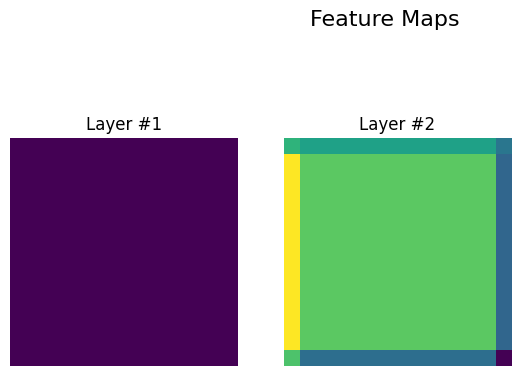

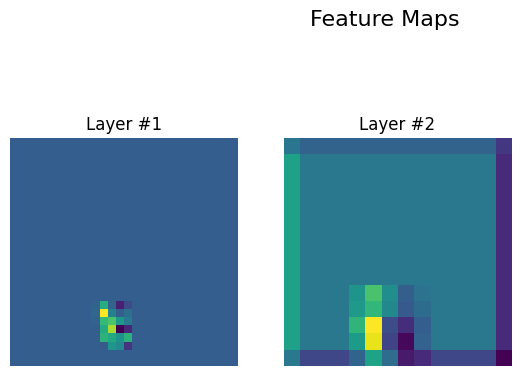

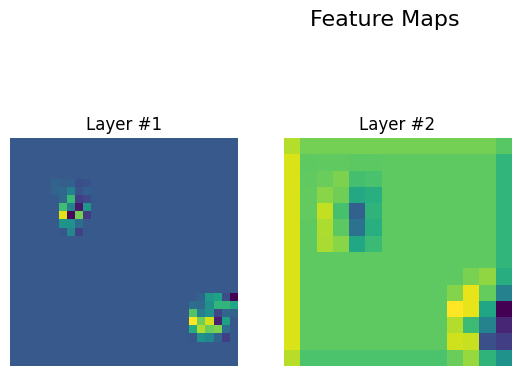

Acc =  0.5802552
Loss =  0.37481555
Acc =  0.61383927
Loss =  0.3411833
Epoch:  1


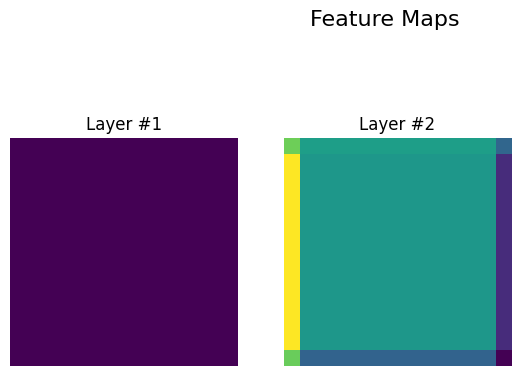

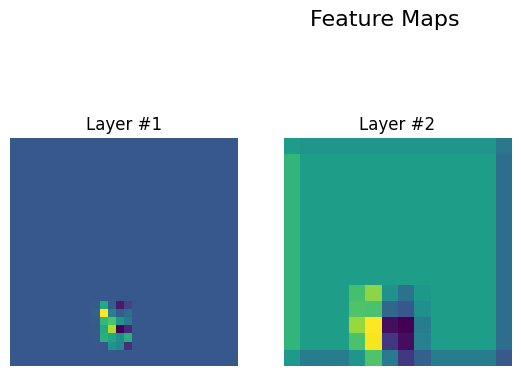

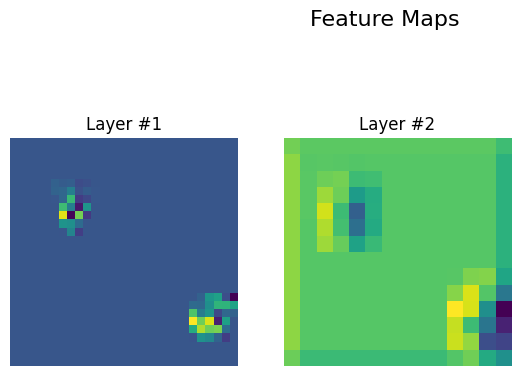

Acc =  0.6610542
Loss =  0.29431045
Acc =  0.7038374
Loss =  0.24937367
Epoch:  2


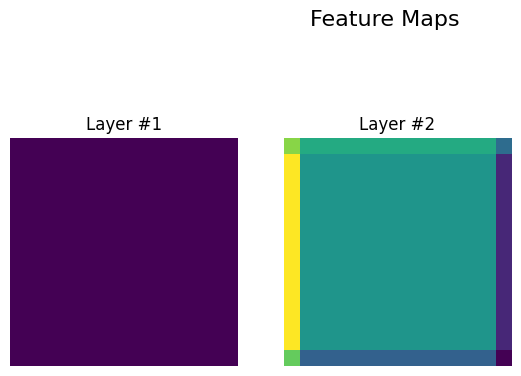

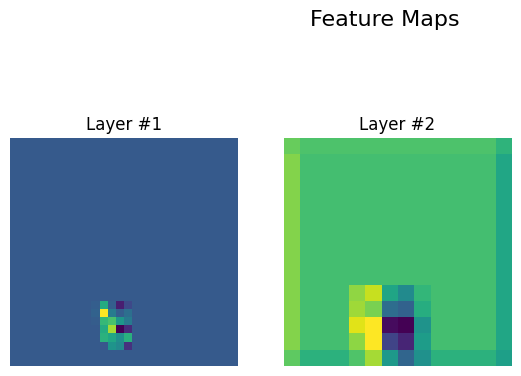

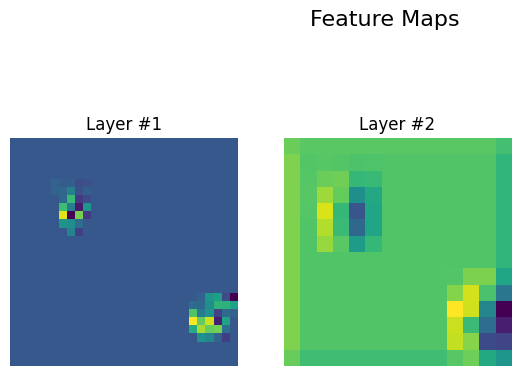

Acc =  0.68995875
Loss =  0.24030083
Acc =  0.7364646
Loss =  0.20529664
Epoch:  3


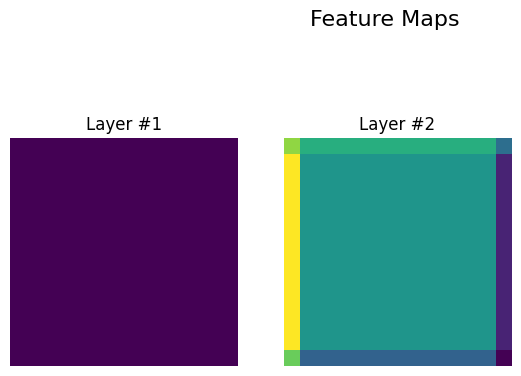

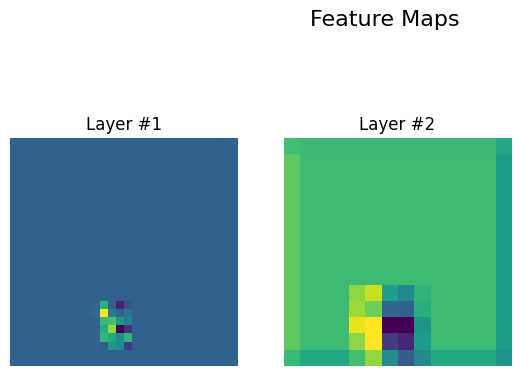

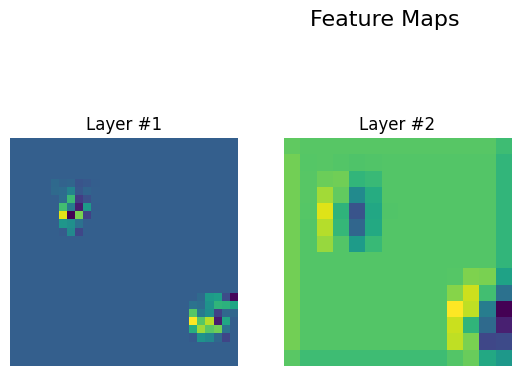

Acc =  0.60923904
Loss =  0.34442034
Acc =  0.66251904
Loss =  0.28987232
Epoch:  4


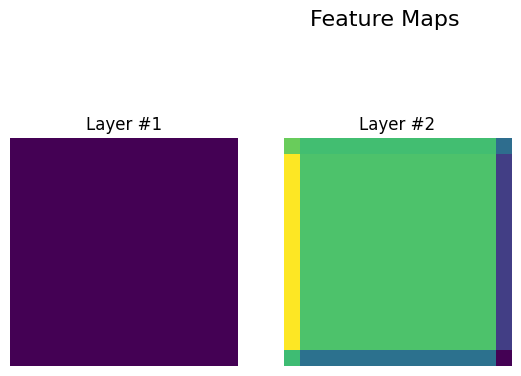

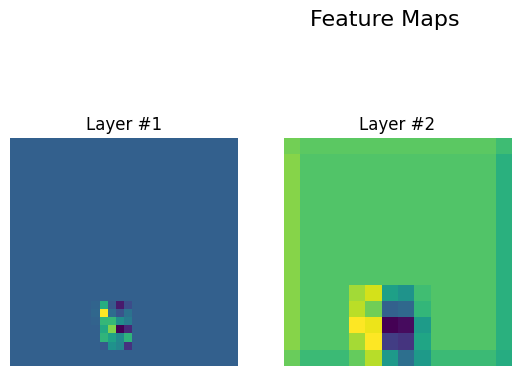

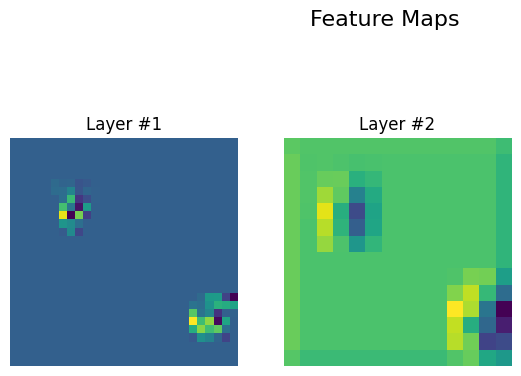

Acc =  0.72332764
Loss =  0.19661035
Acc =  0.7623955
Loss =  0.17783923
Epoch:  5


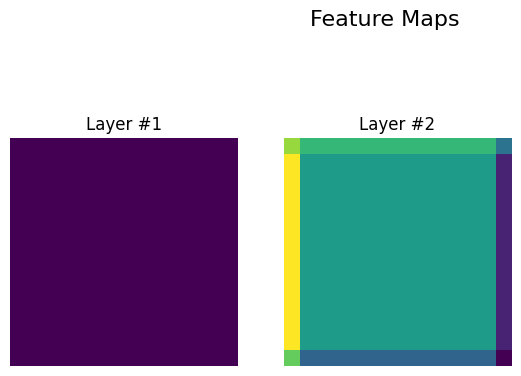

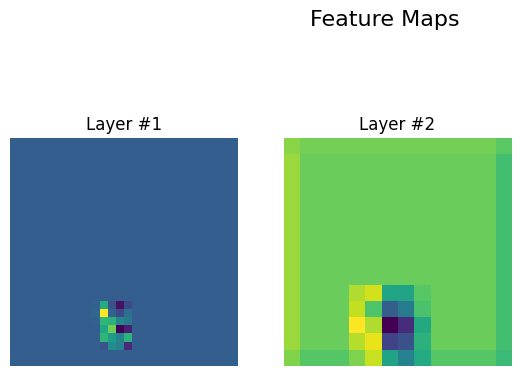

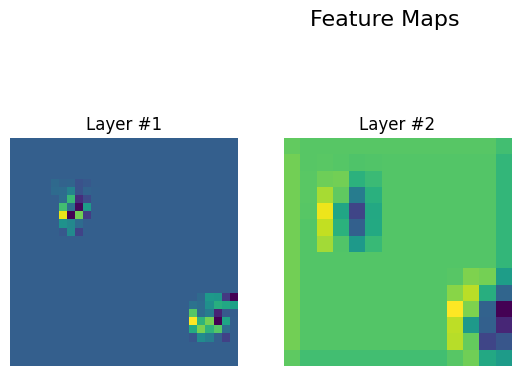

Acc =  0.7289363
Loss =  0.19215691
Acc =  0.7652925
Loss =  0.17253135
Epoch:  6


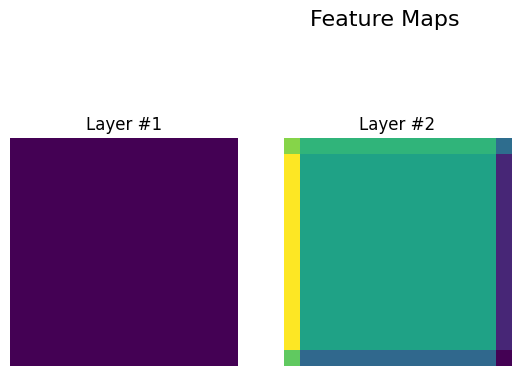

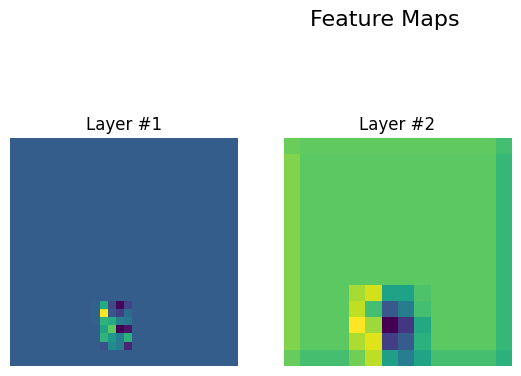

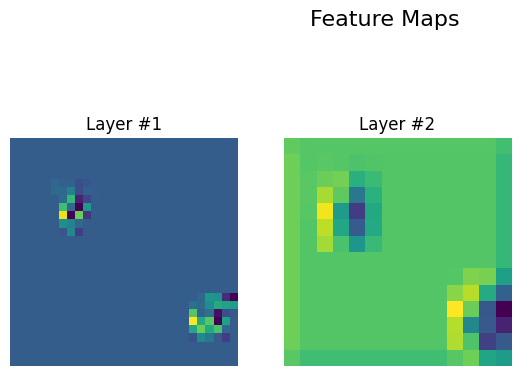

Acc =  0.7993224
Loss =  0.1530511
Acc =  0.82480055
Loss =  0.14187306
Epoch:  7


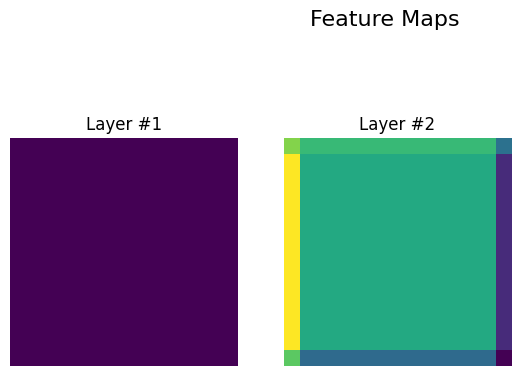

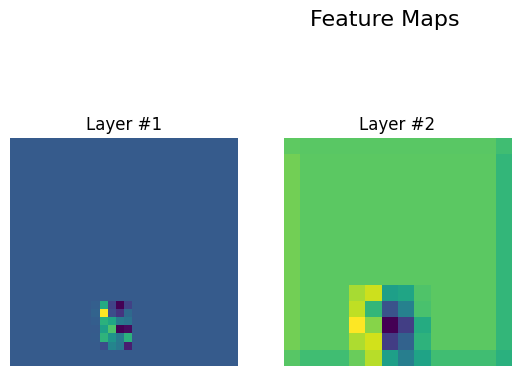

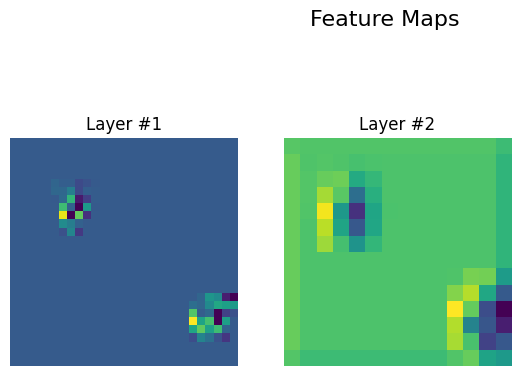

Acc =  0.79062045
Loss =  0.15775375
Acc =  0.8294548
Loss =  0.14071019
Epoch:  8


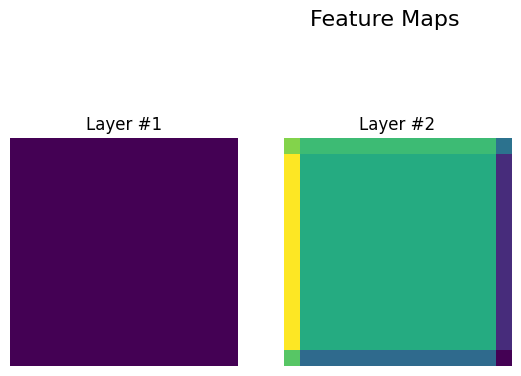

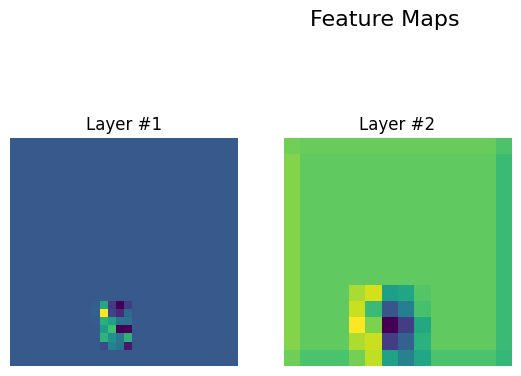

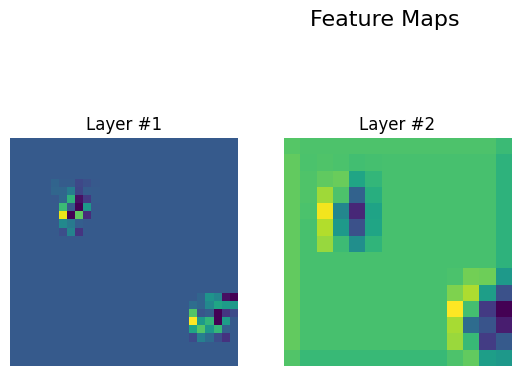

Acc =  0.8588198
Loss =  0.11931651
Acc =  0.8522036
Loss =  0.12663245
Epoch:  9


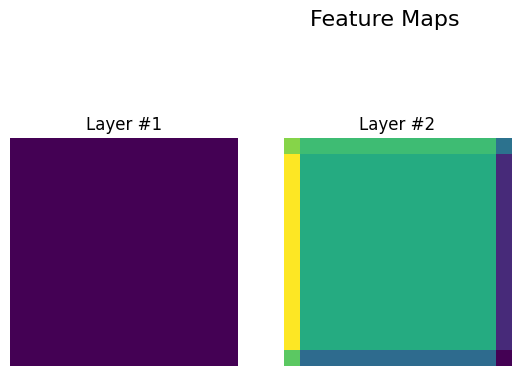

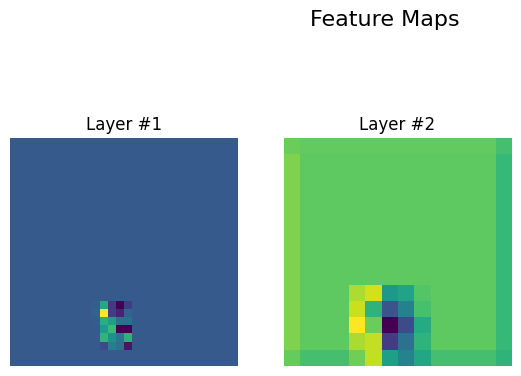

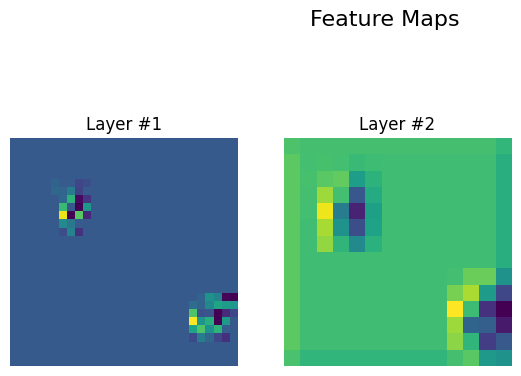

Acc =  0.89189404
Loss =  0.10231975
Acc =  0.88155395
Loss =  0.1052976


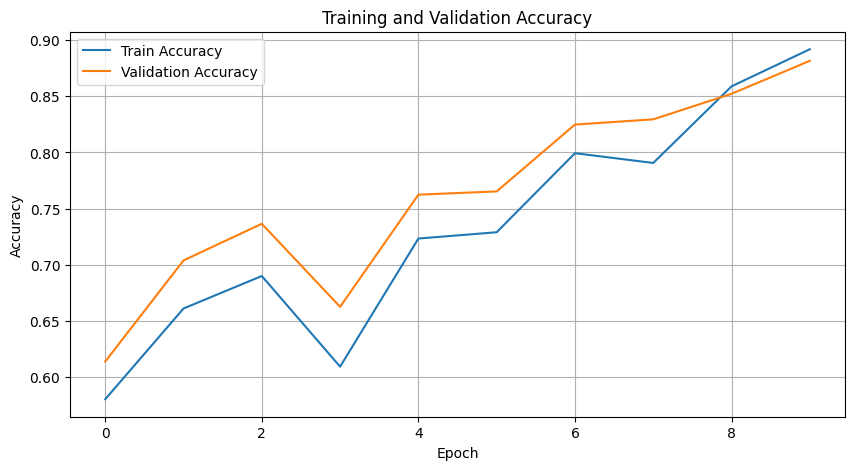

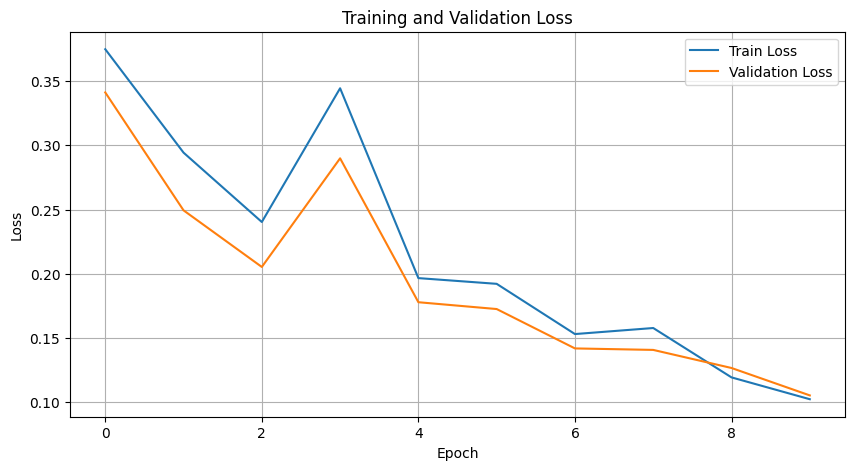

In [9]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 64]
config_model['FCLayers'] = [64*7*7, 512, 1]
config_model['kernel_size'] = [3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = [2, 2]
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)